# A Master Class in Directed Acyclic Graphs in Causal Inference

## A step-by-step explanation of Directed Acyclic Graphs from the basics to more advanced aspects

In [1]:
!conda info --envs

# conda environments:
#
base                     C:\Users\GHarr\anaconda3
project-env           *  C:\Users\GHarr\anaconda3\envs\project-env



In [2]:
# My nbextnesions work, they just don't show!!
#!jupyter nbextension enable spellchecker/main
#!jupyter nbextension enable hide_input/main

In [3]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression


import sys
sys.path.insert(1, r'C:\Users\GHarr\OneDrive - Lincoln College\Python Projects\Data Science\Utilities')

from Causal.lib.causal_tools2 import DirectedAcyclicGraph, scatter, scatter_conditioned
    
N : int = 1000

## Objective
Having spent a lot of time researching causal inference I began to realise that I did not have a full grasp of Directed Acyclic Graphs (DAGs) and that this was hampering my efforts to develop my understanding to a point where I could apply it in order to solve real-world problems.

This objective of this article is to document my learning journey and to share everything you need to know about DAGs in order to take your understanding of Causal Inference to the next level.

## Background
I would like to start by proposing a deinfition for causal inference -

"Causal inference is the process of reasoning and the application of conclusions drawn from cause-and-effect relationships between variables while taking into account potential confounding factors and biases."

That is quite a mouthful but it does encapsulate the key points -

1. It is the study of cause-and-effect.
2. The point is to draw conclusions that can be applied to solve real-world problems.
3. Any bias or "confounding" must be taken account of and compensated for.

Moving beyond the definition, there is an age old saying that "correlation does not imply causation" which leads to the question "so what does then?" 

It turns out that causation cannot be inferred or calculated from a set of data in isolation. That data needs to be extended and supplemented with additional information that can propose, visualise and represent the causal relationships and one common appraoch to the is to use a "Directed Acyclic Graph".


## A Simple DAG
At the most basic level DAGs are very simple indeed. The example below is representing the proposed relationship between taking a drug "D" and recovery "R" and the arrow is stating that taking the drug has a causal effect on recovery ...

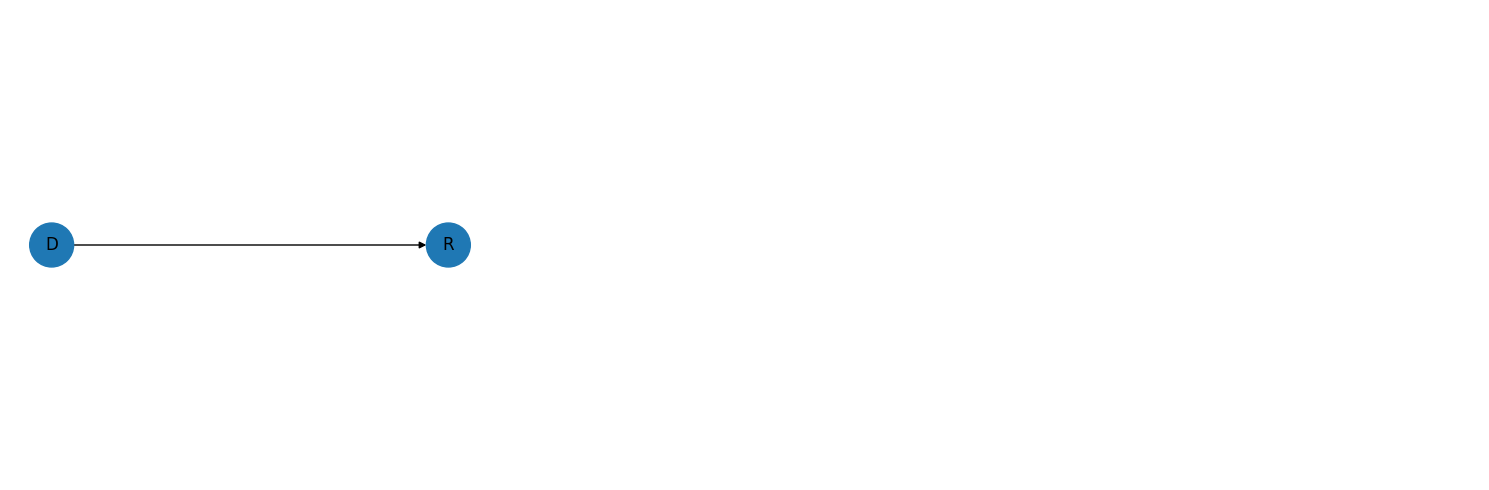

In [4]:
edges : list = [("D", "R")]
pos: dict = {"D": (1, 1), "R": (2,1)}
    
dag = DirectedAcyclicGraph(edges=edges, pos=pos, treatment="D", outcome="R")
dag.draw(grid_size=3)

This DAG illustrates two of the key terms - "treatment" and "outcome".

- "treatment" refers to the action or intervention being studied or manipulated to determine its effect on the outcome. 
- "outcome" refers to the variable being measured to determine the effect of the treatment. 

In traditional machine learning terms the treatment is the independent variable(s) and the outcome the dependent varialble.

When I first studied DAGs I was confused by the terminology as "treatment" and "outcome" are typically medical terms and I wondered if DAGs and causal inference were limited to the medical domain. This is not the case, causal inference can be applied to any set of variables in any domain and I suspect the medical-sounding terminology has been borrowed because drug and treatment trials have a significan overlap with causal inference.

## A DAG with a "Confounder"

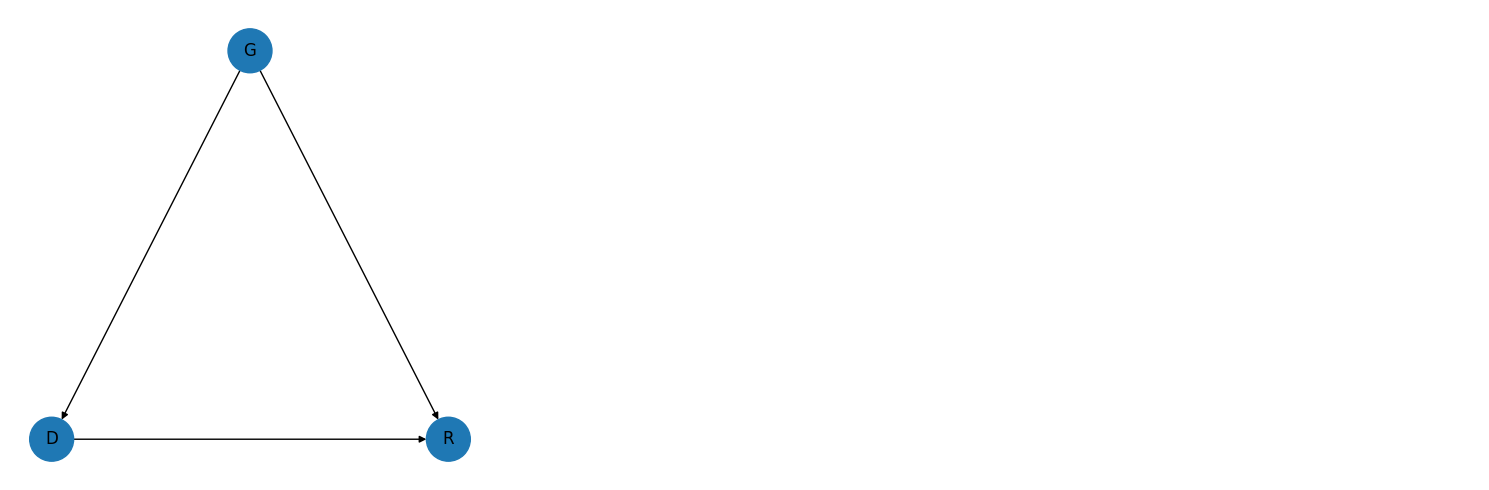

In [5]:
edges : list = [("D", "R"), ("G", "D"), ("G", "R")]
pos: dict = {"D": (1, 1), "G": (2,2), "R": (3, 1)}
    
dag = DirectedAcyclicGraph(edges=edges, pos=pos, treatment="D", outcome="R")
dag.draw(grid_size=3)

This example adds another factor - "G" or gender. The arrows show that gender (G) has a causal affect on both the drug (D) and on recovery (R). The explanation for this is as follows -

- More males than females decide to take the drug so "Gender" causes "Drug".
- Females have a better natural recovery rate than males so "Gender" causes "Recovery".

This complicates things significantly. The objective is to establish the true effect of taking the drug on recovery but gender is affecting both so simply observing how many people in the trial took the drug and recovered does not provide an accurate answer.

This mixing effect is called "confounding" and a variable that causes this effect is a "confounder" which must be "de-confounded" to establish the true efficacy of the drug ...

## Randomized Control Trials, Stratification, Conditioning, Controlling and Covariates

In order to calculate the true effect of D on R we need to isolate and remove the effect of G. There are several approaches that can be applied including the following ...

### Randomized Control Trials

If this was a future trial that was being planned, one tried-and-tested approach would be to create a "Randomized Control Trial" (RCT). This would involve randomly assigning the drug trial subjects into a test group that receives the drug and a control group that received a placebo. (Note: it is important not to tell the subjects which group they have been allocated to).

It is now impossible for gender to be causing or influencing who takes the drug because subjects are assigned randomly . This effetively "rubs out" the causal relationship between "G" and "D" which means that any observed affect of the drug on recovery will now be independent of the confounding effect - 

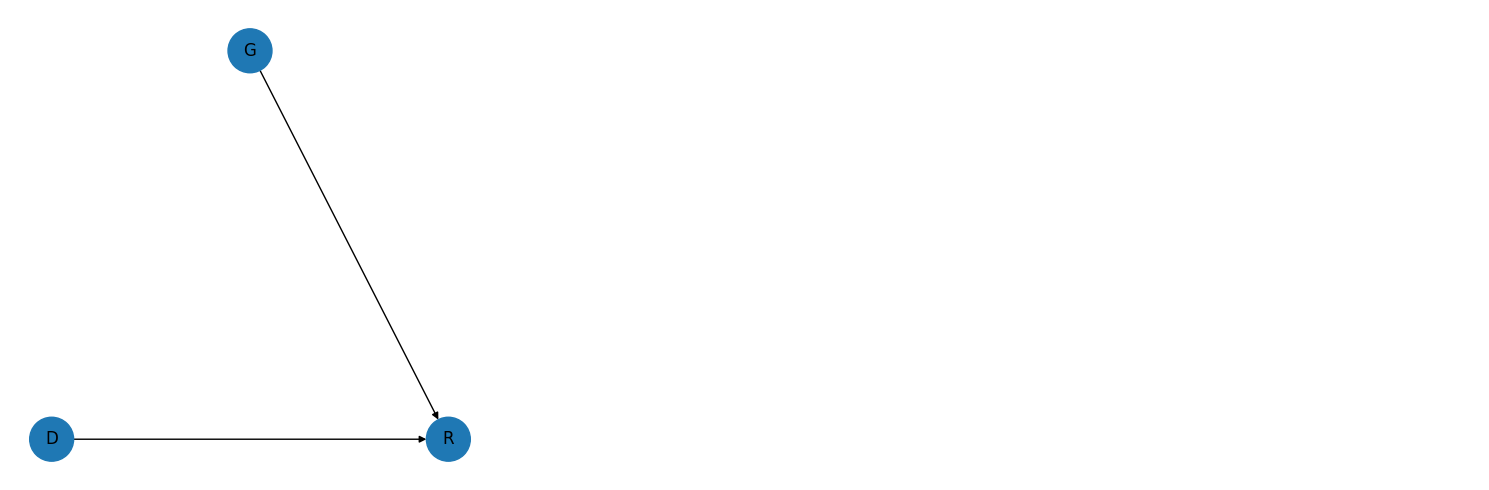

In [6]:
edges : list = [("D", "R"), ("G", "R")]
pos: dict = {"D": (1, 1), "G": (2,2), "R": (3, 1)}
    
dag = DirectedAcyclicGraph(edges=edges, pos=pos, treatment="D", outcome="R")
dag.draw(grid_size=3)

However, if the study is based on a historical trial where the data has already been recorded it is too late to randomly assign the test and control groups and an RCT cannot be used.

Another big challenge with RCTs is that if the "treatment" being studied is smoking or obesity it is not possible to randomly assign into a smoking group or obese group so clearly there are moral and ethical boundaries that limit the applicability of RCTs.

Fortunately there are other approaches that can be applied to historical, observational data to mitigate these challenges including "stratification" ...

### Stratification

In our example, if the subjects were 60% male and 40% female the affect of the drug "D" on recovery "R" can be isolated and calculated as follows -

1. Calculate the recovery for males and multiply by 0.6 (as 60% are males).
2. Calculate the recovery for females and multiply by 0.4 (as 40% are females).
3. Add the two numbers together and this gives the affect of the drug on recovery independent from the impact of gender.

Unfortunately there are some additional challenges with stratification and similar statistical techniques.  For example, if there are a large number of causal relationships the stratification could become very complicated.

Consider the following DAG ...

- A = Parental Smoking
- B = Childhood Asthma
- C = Underlying Atopy (Unobserved)
- D = Parental Asthma
- E = Chronic Bronchitis
- F = Sex
- G = Socio-economic Status
- X = Smoking
- Y = Asthma

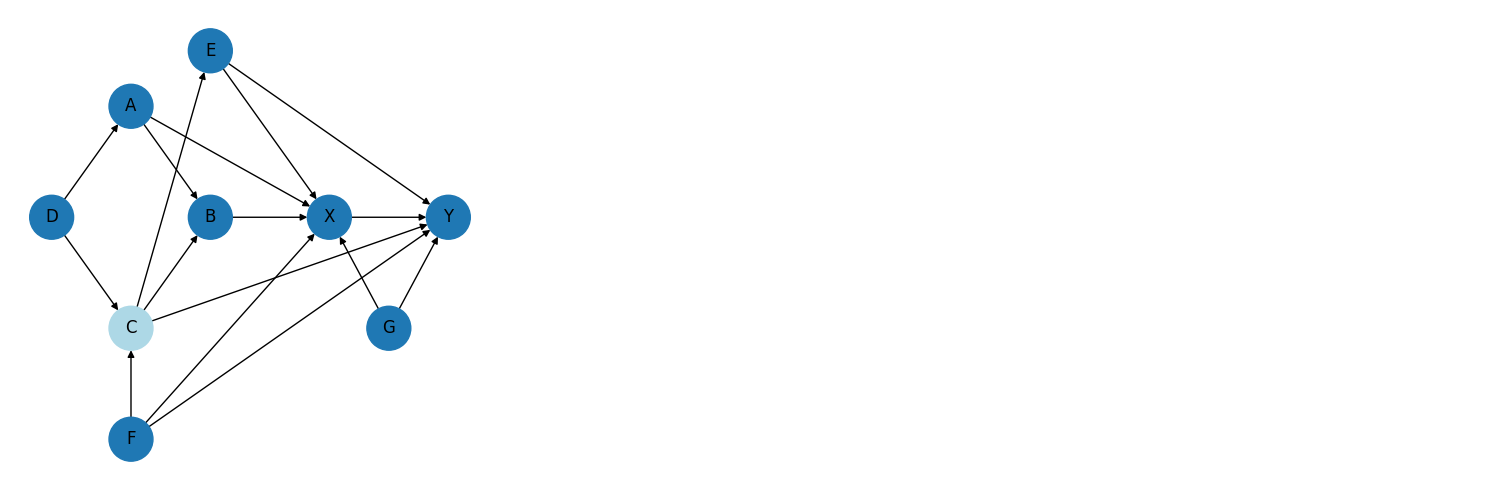

In [51]:
unobserved_confounders = ["C"]
edges : list = [("A", "B"), ("A", "X"), ("B", "X"), ("C", "E"), ("C", "B"), ("C", "Y"), ("D", "A"), ("D", "C"), ("E", "X"), ("E", "Y"), ("F", "C"), ("F", "X"), ("F", "Y"), ("G", "X"), ("G", "Y"), ("X", "Y")]
pos : dict = {"D": (1, 3), "F": (2, 1), "C": (2, 2), "A": (2, 4), "B": (3, 3), "E": (3, 4.5), "X": (4.5, 3), "G": (5.25, 2), "Y": (6, 3)}

dag = DirectedAcyclicGraph(treatment="X", outcome="Y", edges=edges, pos=pos, unobserved_confounders=unobserved_confounders)
dag.draw(grid_size=3)

The first challenge is working out which variables to stratify on which is no easy problem to solve. It would require either someone with a lot of experience of causal relationships or a good causal inference software library, both of which are hard to find!

The second challenge is that stratification on 3 variables with 4 sub-groups in each variable requires 3 x 4 = 12 stratified groups, hence the number of samples in each becomes smaller and smaller which will decrease the confidence in the outcomes.

### Conditioning

Using causal inference techniques it is possible to simulate the affect of a real-world Randomized Control Trial on historical and observational data. 

This sounds like magic but it uses sound mathematical techniques that have been established, defined and described over many years by experts including Judea Pearl who has published his findings in academic journals and books including the following -

- The Book of Why
- Causal Inference in Statistics

This "simulation" of RCTs is achieved by applying something called <b>backfoor adjustment</b> to <b>condition</b> on all the <b>confounders</b> i.e. the variables that affect both the treatment and the outcome.

Here is the <b>backdoor adjustment formula</b> for a single treatment variable (X) on a single outcome variable (Y) with a single confounder (Z) -

$$
P(Y \mid do(X)) = \sum_{z} P(Y\mid X, Z=z)\ P(Z=z)
$$


The key takeaway is that the left hand side is describing an "intervention", for example "assign everyone to take the drug" (do(X)) which is re-written on the right hand side and expressed in terms of purely observational data.

A detailed explanation of the maths is beyond the scope of this article but if you would like to see a fully worked example, check this link out -

https://towardsdatascience.com/unlock-the-power-of-causal-inference-a-data-scientists-guide-to-understanding-backdoor-686d2826efa4

### Controlling

Controlling is a statistical technique that refers to holding the value of a variable constant that might otherwise adversely affect the outcome of a trial. 

For exmaple, in a trial that is investigating the effect of Vitamin D on alertness the designers of the trial might decide to give all participants specific instructions about their diet, when they eat, caffeine intake, screen time, exercise and alcohol intake in an attempt to isolate the true effect.

There seems to be some healthy disagreement in the literature at this point. Statisticians often seem to control for everything they can, even in a Randomized Control Trial.

Proponents of causal inference in general and Judea Pearl in particular seem to advocate only controlling (or conditioning) on those variables that are specifically confounding the effect of the treatment on the outcome.

I do share Pearl's view that controlling for everything in a trial may not be necessary and may even have unintended negative consequences on the results. My reasoning is that in a Randomized Control Trial any external factors like caffeine intake etc. should average out within and across the groups because of the random selection of the participants and also how do we know for sure that the participants followed the instructions?

Also the theory of Causal Inference does make a strong case for identifying an optimum set of variables to condition on and to limit the adjustments accordingly (more on this later).

### Covariates
One definition of covariates are <b>variables that affect a response variable, but are not of interest in a study.</b> Consider the following DAG ...

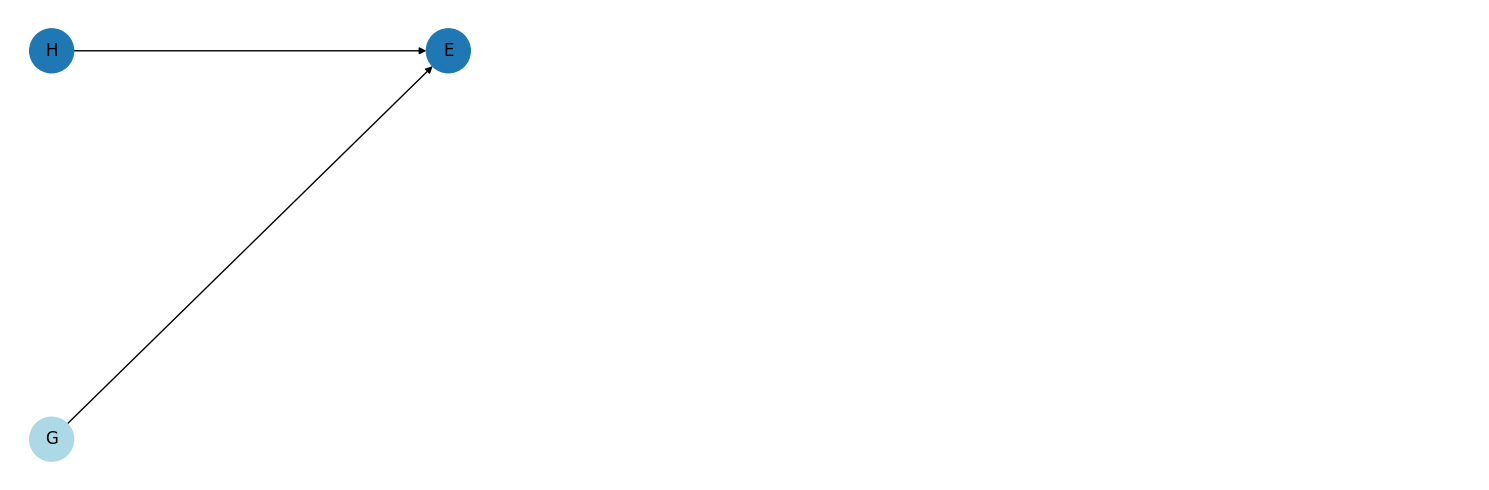

In [8]:
edges : list = [("H", "E"), ("G", "E")]
pos: dict = {"H": (1, 2), "E": (2,2), "G": (1, 1)}
    
dag = DirectedAcyclicGraph(edges=edges, pos=pos, treatment="H", outcome="E", unobserved_confounders=["G"])
dag.draw(grid_size=3)

H represents the hours of studying and is the treatment and E represents the exam score (the outcome) which are the only variables of interest.

However, a domain expert points out that prior student ability also affects the exam score and although it is of not interest to the study they introduce it to the model.

In this case G satisfies the definition of a covariate.

My personal observation is that covariates appear to be a concept used in statistical and observational analyses, and hence favoured by statisticians and that proponents of causal inference may be inclined to say that unless G is a confounder of H and E it does not need to be introduced into the model.

Note that I have included an explanation of <b>covariates</b> for completeness as they are often mentioned in the literature and it is important to be able to understand the points being made whilst appreciating the difference between covariate and confounders.

### Recap 
At this point we have defined causal inference, explored the purpose of DAGs and explained confounders, RCTs, stratification, conditioning and controlling.

RCTs, stratification and controlling are all statistical technqiues related to real-world trials. 

Conditioning is a causal inference technique that can be applied to historical, obervational data to draw conclusions about the affect of a treatment on an outcome even where the participants of the original survey were not selected at random.

This instantly opens up a world of opportunity because there are lots of historical, observational datasets that can now be explored for cause-and-effect and this is just one of the many benefits of causal inference and directed acyclic graphs.

Armed with this understanding and terminolofgy we are now ready to explore and the more complex aspects of DAGs which are often not explained clearly in the available books and online articles ...

## Paths
Paths are a difficult subject to master because the concepts and techniques are all inter-related making the order of learning difficult. In the sections below I present paths at a high level, then delve into the patterns of forks, chains and colliders. 

This leads into conditioning, blocking and unblocking which only make sense when the topic of paths is completed by learning about how to condition an entire DAG to remove the effect of confounding and draw casual conclusions.

Let's start by considering the following Directed Acyclic Graph ...

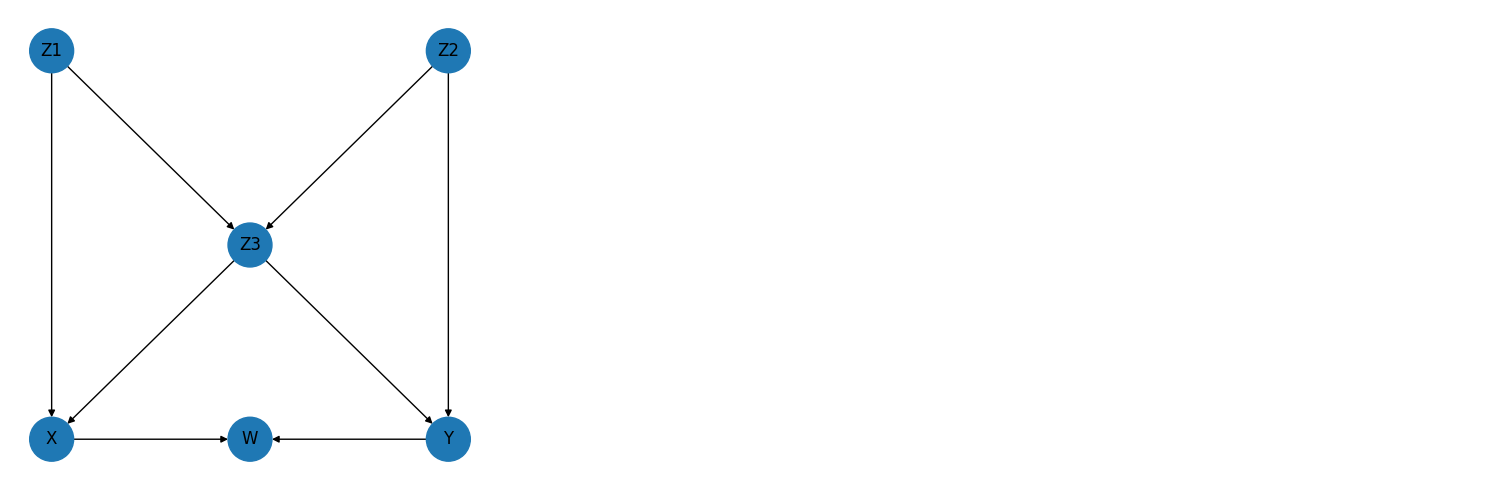

In [9]:
edges : list = [('Z1', 'Z3'),  ('Z1', 'X'),  ('Z3', 'X'), ('Z3', 'Y'), ('X', 'W'), ('Z2', 'Z3'), ('Z2', 'Y'), ('Y', 'W')]
pos : dict = {'X':(1, 1), 'W':(2, 1), 'Y':(3, 1), 'Z1':(1, 3), 'Z3':(2, 2), 'Z2':(3, 3)}
    
dag = DirectedAcyclicGraph(treatment="X", outcome="Y", edges=edges, pos=pos)

dag.draw(grid_size=3)

This is more complicated that the drug, gender, recovery example but quite staright-forward once the key concept of <b>paths</b> has been unpacked. I have not managed to find a definitive definition of "path" in the literature, so here is my definition ...

<b>A path is a sequence of causal links connecting the treatment and the outcome in a causal diagram.</b>

In the above DAG, therfore, a single path is -  $X \leftarrow Z1 \rightarrow Z3 \rightarrow Y$.

Initially this is unituitive because we are used to thinking of natural paths flowing directionally from left to right like $A \rightarrow B \rightarrow C$ but I would ask you to suspend that intuitive view. In causal diagrams the direction of the arrows does not matter, any set of edges from X to Y constitutes a path.

Once that point is fully understood the difference between DAGs and the flattened form like $D \leftarrow G \rightarrow R$ becomes clear.

A Directed Acyclic Graph is a visualisation of a set of causal relationships that contains a number of paths. Whenever the available literature examines the flattened form it is looking at a single path that must exist with others to describe all the causal relationships.

To illustrate this explanation here is a list of all the "flattened" paths that exist within the example DAG ...

In [10]:
dag.print_paths(dag.all_paths(), display_latex=True)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

An alternative visualisation to the flat view is to highlight every path on a separate copy of the DAG as in the following example ...

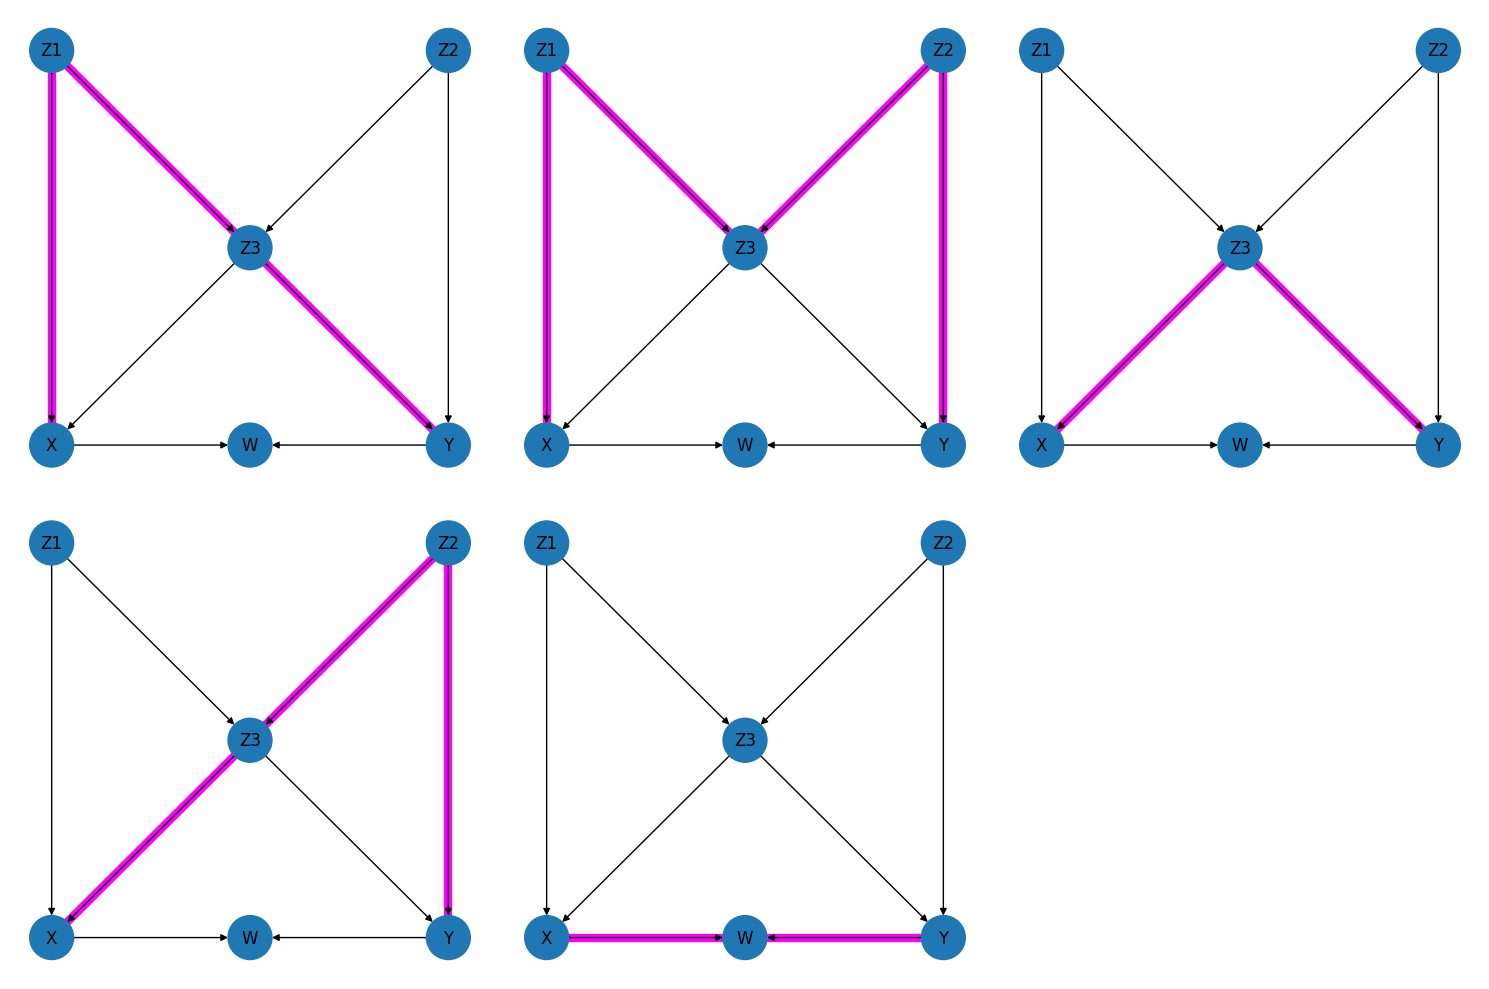

In [11]:
dag.draw_paths(paths=dag.all_paths())

Once these key points have been unpacked, paths are not very difficult to understand. I have often wondered if the authors of the available books and articles are so expert in their subjects that they overlook how it feels to be building an understanding from a beginners perspective.

Visualising DAGs and paths like this certainly helped me to build an understanding that is critical to moving onto the next stage ...

## Junctions, Forks, Chains and Colliders
Within any "flattened" path there will be a series of nodes representing the variables of interest with an arrow or edge connecting each one to the next that is uni-directional and that can point in either direction, for example $A \rightarrow B \rightarrow C$.

Any node that has two arrows must be in the middle of a path rather than at either end and this is referred to as a <b>junction</b>.

A junction can only be one of three patterns - fork, chain or collider which are all explored and explained in the sections below.

### Forks
Forks are a familiar as the relationship between drug (D), recovery (R) and gender (G) follows to this pattern. Here is an example visualised in a DAG and as a flattened path ...

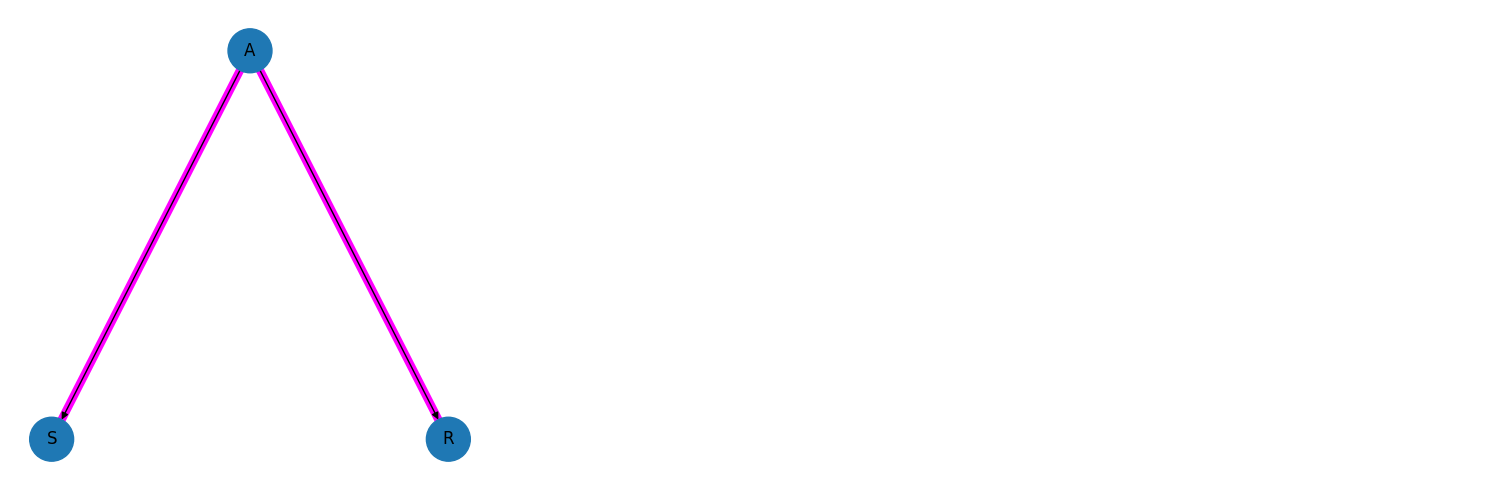

<IPython.core.display.Math object>

In [12]:
edges : list = [("A", "S"), ("A", "R")]
pos: dict = {"S": (1, 1), "A": (2,2), "R": (3, 1)}
    
dag = DirectedAcyclicGraph(edges=edges, pos=pos, treatment="S", outcome="R")
dag.draw_paths(dag.backdoor_paths())
plt.show()
dag.print_paths(dag.backdoor_paths(), display_latex=True)

This example represents the causal relationships between childrens' ages (A), shoe-size (S) and reading ability (R). It is called a "fork" because the path forks off in two different directions from the intermediate variable A.

The rules of causal inference consider the path from S to R through A to be <b>open</b> i.e. that information about S can make its way over to R through the confounder A unless we "condition" on A in which case the path is <b>blocked</b>.

This rule confused me for a long time, but it is easily explained by looking at a practical example with some data.

The synthetic dataset below contains 1000 data points for S, A and R ...

In [13]:
# Data for Age, Shoe Size, Reading Ability example
np.random.seed(42)

fS = lambda age: 2 * age + 2  + np.random.normal(loc=0, scale=1, size=1)[0]
fR = lambda age: 1.5 * age + 20  + np.random.normal(loc=0, scale=1, size=1)[0]

df = pd.DataFrame()

df["Age"] = np.random.uniform(4, 12, N).round()

df["Shoe Size"] = df["Age"].apply(fS).mul(2).round().div(2)
df["Reading Ability"] = df["Age"].apply(fR)

df = df[["Shoe Size", "Age", "Reading Ability"]]
df.head()

,Shoe Size,Age,Reading Ability
0,16.0,7.0,29.093683
1,24.5,12.0,37.916894
2,22.5,10.0,33.495280
3,20.5,9.0,34.260056
4,12.5,5.0,27.582440


The synthetic dataset reflects the causality described in the DAG so we would expect a correlation between age and shoe size and also between age and reading ability. Here are two scatter plots that visualise  these associations ...

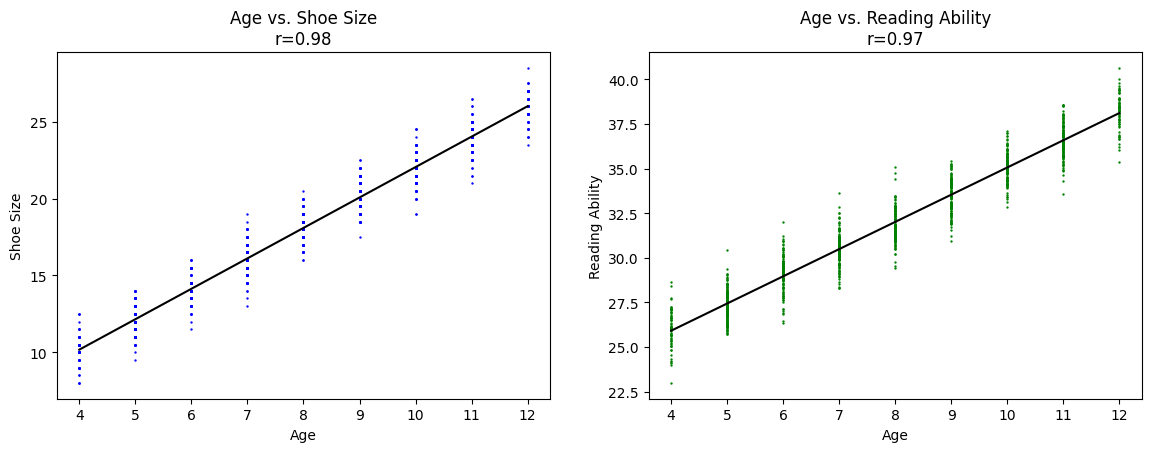

In [14]:
fig = plt.figure(figsize=(14, 4.5))

plt.subplot(1, 2, 1) 
scatter(X=df["Age"], Y=df["Shoe Size"], color="b", title="Age vs. Shoe Size\n")

plt.subplot(1, 2, 2) 
scatter(X=df["Age"], Y=df["Reading Ability"], color="g", title="Age vs. Reading Ability\n")

Sure enough they are closely correlated with strong r scores. But what happens when we look at the correlation between shoe size and reading ability? There is no causal link but we will still see a correlation because age is having a <b>confounding</b> effect on both variables.

This apparently enables reading ability to be predicted from age and in a traditional predictive machine learning algorithm this could work, but there is no causal link because buying larger shoes will not make anyone more intelligent or vice versa. 

The next step is to understand what happens when we <b>condition</b> on age. Conditioning (and controlling) effectively holds or freezes the variable we are conditioning on to a single value or a narrow range or strata for a continuous variable. The difference is that conditioning achieves the affect through a mathematical formula and controlling isolates a group of interest in a real-world trial.

Therefore, the association between shoe size and age can be examined either unconditioned for all values of age or conditioned by selecting a single value for age which can easily be visualised as follows ...

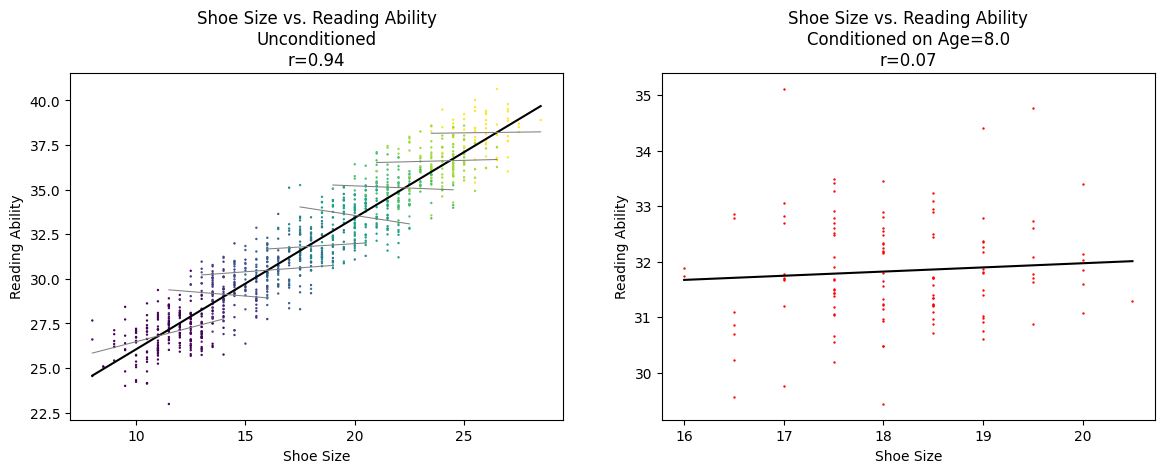

In [15]:
scatter_conditioned(X=df["Shoe Size"], Y=df["Reading Ability"], Z=df["Age"], strata=8)

The first plot is unconditioned (i.e. it shows all ages) and we can see that there is a strong correlation between S and R.

The second chart age is conditioned by fixing to just the 8 year-olds. There is a clear difference in that there is no correlation between shoe size and reading ability for a single age and the regression line is flat with a low r value. 

In the unconditioned chart it is possible to use the regression line to pick a shoe size and read across to predict a reading ability and this is what the term <b>unblocked</b> is referring to.

In the conditioned chart it is not possible to use the regression line to make a prediction because the line is horizontal and this is what the term <b>blocked</b> is referring to.

<b>Conditioning on the intermediate node in a fork <b>blocks</b> the path whilst not conditioning on it leaves it <b>unblocked</b> and open.</b>

An additional feature has been added to the charts to help understand this effect. In the unconditioned chart the individual ages have been colour coded so they can be picked out and the regression lines for each age added in light grey. 

Considering these visual features it is immediately obvious that for any individual age the regression line is flat and the correlation low but when all the ages are considered together the combined correlation is high.

This phenomena is called <b>Simpson's Paradox</b> which is another term used in the literature which is difficult to explain in words but easy to understand in pictures.

### Chains
Chains are the simplest pattern between two nodes through an intermediary. The first variable has a causal affect on the intermediary which has a causal affect on the final variable.

Please note that the middle node in a junction is referred to as an <b>intermediate</b> node but the middle node in a chain can also be referred to as an <b>intermediary</b> because it mediates changes between the source (first) and target (third) node.

Here is an example of a <b>chain</b> where D represents taking a drug, B the patient blood pressure and R the patient recovery. The causal arrows are representing that the drug causes blood pressure to change which in turn causes recovery ...

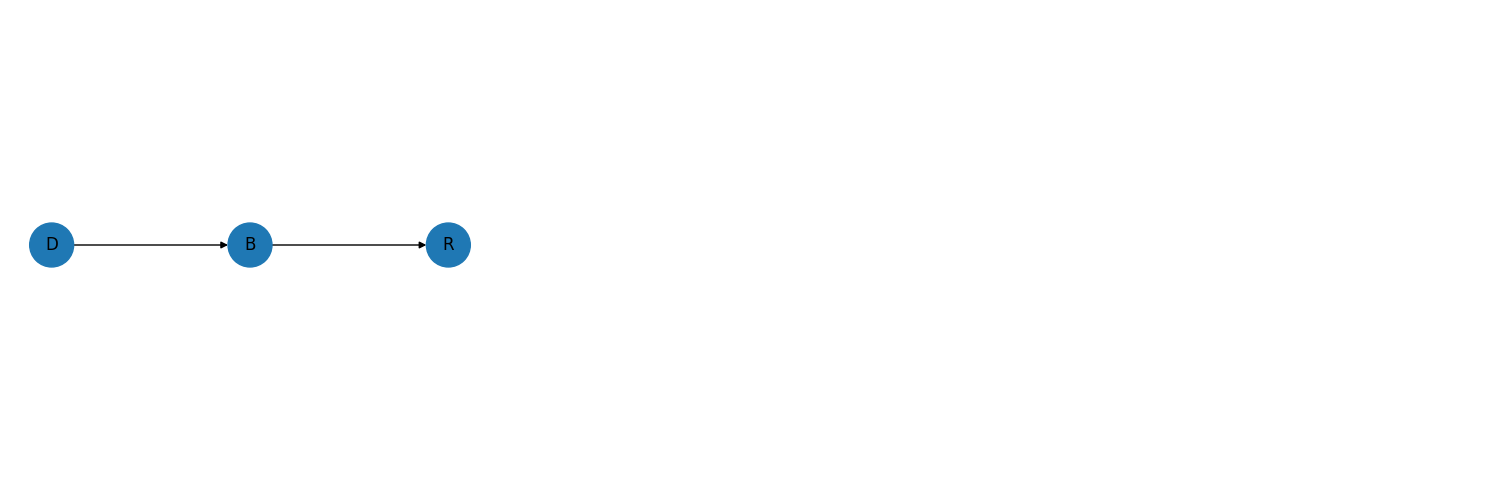

<IPython.core.display.Math object>

In [16]:
edges : list = [("D", "B"), ("B", "R")]
pos: dict = {"D": (1, 1), "B": (2, 1), "R": (3, 1)}
    
dag = DirectedAcyclicGraph(edges=edges, pos=pos, treatment="D", outcome="R")
dag.draw(grid_size=3)
plt.show()
dag.print_paths(dag.all_paths(), display_latex=True)

Conditioning on a chain has exactly the same affect as conditioning on a fork i.e. conditioning will block the path and leaving it unconditioned will unblock it.

It is much easier to understand this counter-intuitive statement by visualising an example so let's start with a synthetic data set representing the causal relationships in the DAG ...

In [17]:
np.random.seed(42)

fB = lambda drug: -1.5 * drug + 10 + np.random.normal(loc=0, scale=1, size=1)[0]
fR = lambda bp: -1.5 * bp + 32 + np.random.normal(loc=0, scale=1, size=1)[0]

df = pd.DataFrame()

df["Drug"] = np.random.uniform(0, 5, N)
df["Blood Pressure"] = df["Drug"].apply(fB)
df["Recovery"] = df["Blood Pressure"].apply(fR)

df.head()

,Drug,Blood Pressure,Recovery
0,1.872701,7.368650,19.540707
1,4.753572,1.534298,29.615447
2,3.659970,4.890243,23.159915
3,2.993292,6.120647,23.579085
4,0.780093,9.389651,17.997964


If we look at a scatter plots for drug vs. blood pressure and and blood pressure vs. recovery we would expect to see a correlation ...

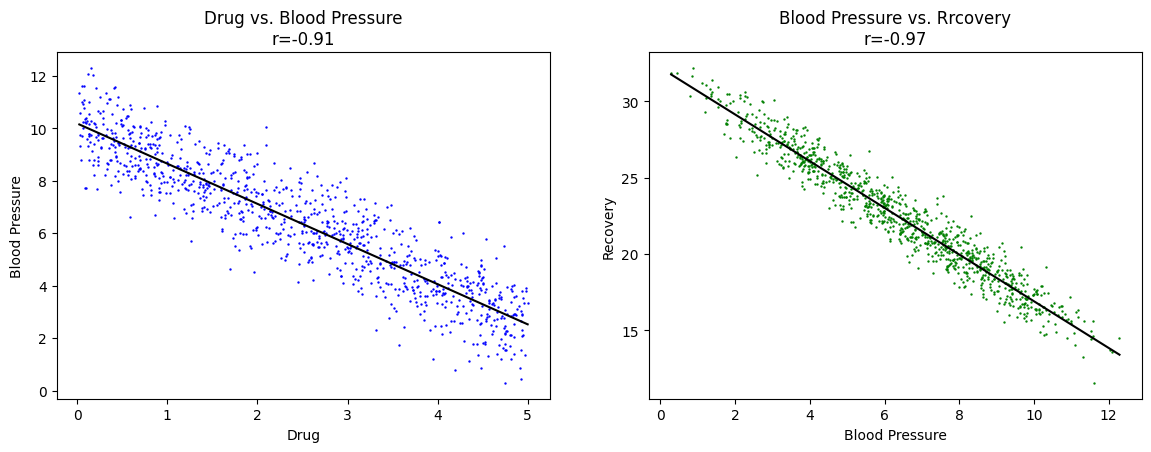

In [18]:
fig = plt.figure(figsize=(14, 4.5))

plt.subplot(1, 2, 1) 
scatter(X=df["Drug"], Y=df["Blood Pressure"], color="b", title="Drug vs. Blood Pressure\n")

plt.subplot(1, 2, 2) 
scatter(X=df["Blood Pressure"], Y=df["Recovery"], color="g", title="Blood Pressure vs. Rrcovery\n")  

The first scatter plot shows that the more of the drug that is taken, the lower the blood pressure and the second shows that the lower the blood pressure is the higher the recovery rate, so the synthetic data is accurately representing the causal relationships in the DAG.

Now let's take a look at the affect of conditioning the on the intermediate variable (blood pressure) ...

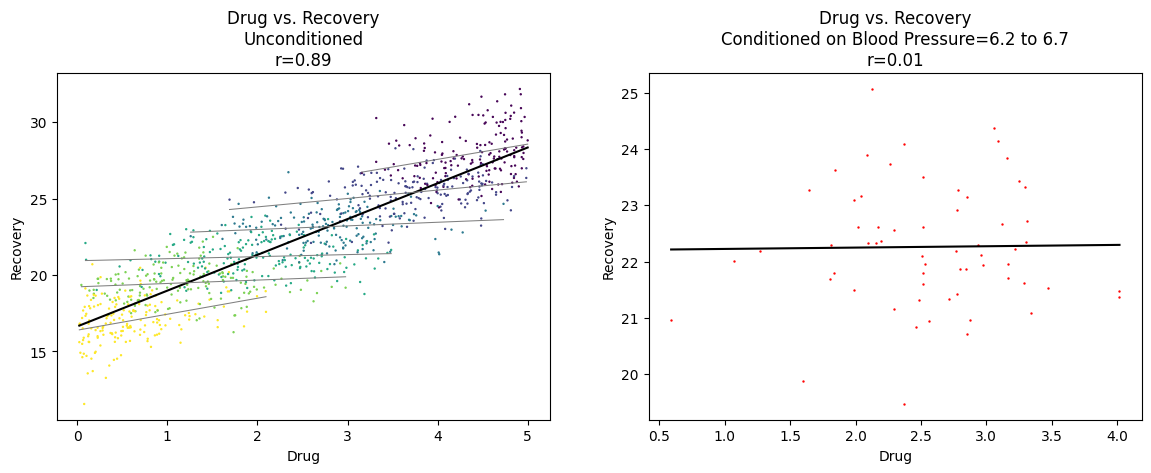

In [19]:
scatter_conditioned(X=df["Drug"], Y=df["Recovery"], Z=df["Blood Pressure"], strata=6)

With no conditioning there is a strong correlation between D and R and when we condition on a single value of B (or a narrow strata in the case of a continuous variable) there is low correlation.

The scatter plots demonstrate that leaving the intermediary in a chain unconditioned leaves the path unblocked whilst 
conditioning on it will block the path.

If this is still feeling a little counter intuitive consider that conditioning on a particular blood pressure (say 6.5) means that B is fixed and cannot change. That means that D and R are not going to change by very much and that any changes in D and R are caused by the error term in the data rather than any causal effect.

The final way to dispel the counter-intuition is to look at the colour of the points in the unconditioned scatter plot. Each colour represents a fixed value of B (blood pressure) and just as in the fork example it is easy to see that the regression line for a single colour would be flat but when all data points are considered as a whole there is a strong correlation.

<b>Conditioning on the intermediate node in a chain blocks and closes the path and not conditioning on it leaves it unblocked and open.</b>

A final point of interest is that the pattern in the data is identical for forks and chains which re-enforces the view that cause-and-effect cannot be established from the data alone. Rather a DAG is required to supplement the data in order to reveal causality supporting the view of the advocates of causality over that of the pure statisticians.

### Colliders
This third and final pattern is a collider which turns out to have some fascinating differences to forks and chains ... 

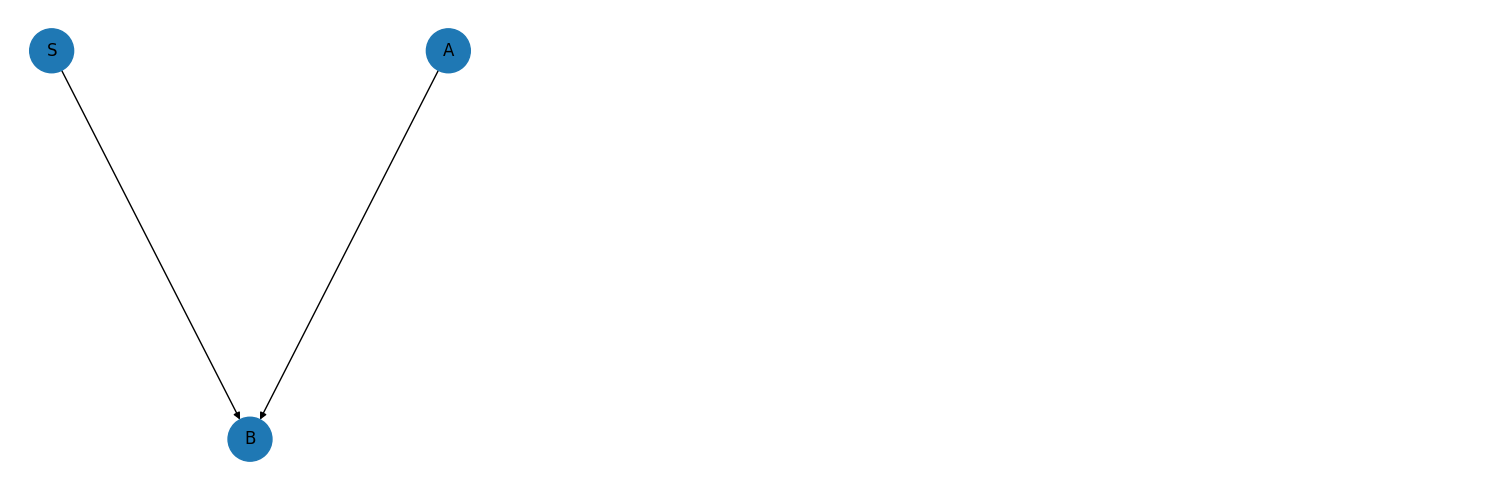

<IPython.core.display.Math object>

In [20]:
edges : list = [("S", "B"), ("A", "B")]
pos: dict = {"S": (1, 2), "B": (2, 1), "A": (3, 2)}
    
dag = DirectedAcyclicGraph(edges=edges, pos=pos, treatment="S", outcome="A")
dag.draw(grid_size=3)
plt.show()
dag.print_paths(dag.all_paths(), display_latex=True)

This DAG represents the following causal relationships in a hypothetical college that specialises in sport -

1. Sporting ability (S) causes the award of student bursaries (B).
2. Academic ability (A) also causes the award of student bursaries (B).

As with the other patterns we will start with a set of data to visualise and understand what goes on inside a path that contains a collider.

In [21]:
np.random.seed(42)

df = pd.DataFrame()

fB = lambda sa, aa : 1.05 * sa + 0.95 * aa  + np.random.normal(loc=0, scale=1, size=1)[0]

df["Sports Ability"] = np.random.normal(5, 2, N)
df["Academic Ability"] = np.random.normal(5, 2, N)
df["Bursary Score"] = df.apply(lambda row: fB(row["Sports Ability"], row["Academic Ability"]), axis=1)

df = df[["Sports Ability", "Bursary Score", "Academic Ability"]]
df.head()

,Sports Ability,Bursary Score,Academic Ability
0,5.993428,13.026697,7.798711
1,4.723471,11.321930,6.849267
2,6.295377,10.681024,5.119261
3,8.046060,11.661221,3.706126
4,4.531693,8.941288,6.396447


The scatter plots for sports ability vs. bursary and academic ability vs. bursary are as follows ...

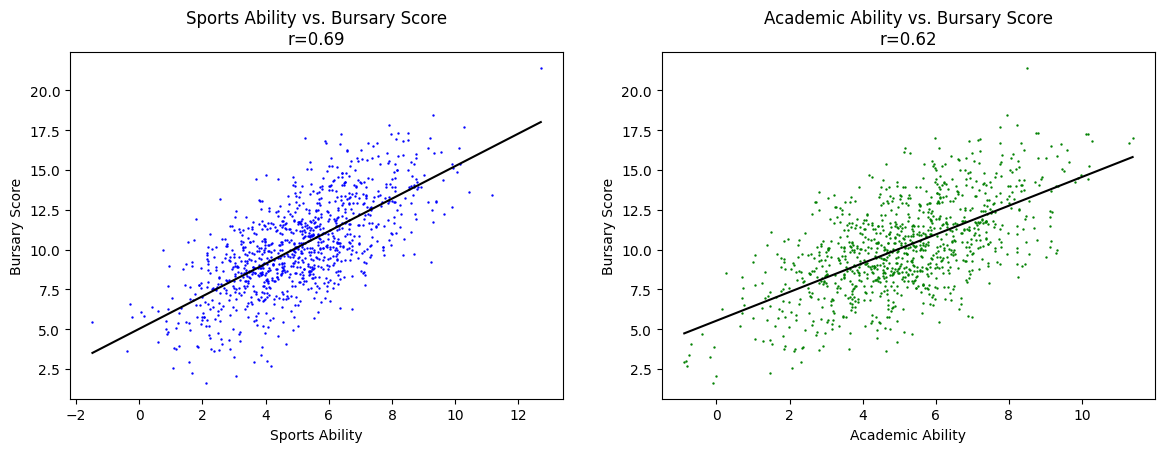

In [22]:
fig = plt.figure(figsize=(14, 4.5))

plt.subplot(1, 2, 1) 
scatter(X=df["Sports Ability"], Y=df["Bursary Score"], color="b", title="Sports Ability vs. Bursary Score\n")

plt.subplot(1, 2, 2) 
scatter(X=df["Academic Ability"], Y=df["Bursary Score"], color="g", title="Academic Ability vs. Bursary Score\n")

Both types of ability are fairly strongly correlated with the score given by the college leading to the award of a bursary. Now let's visualise the affect of leaving the intermediate variable (bursary) unconditioned or fixing and conditioning on it ...

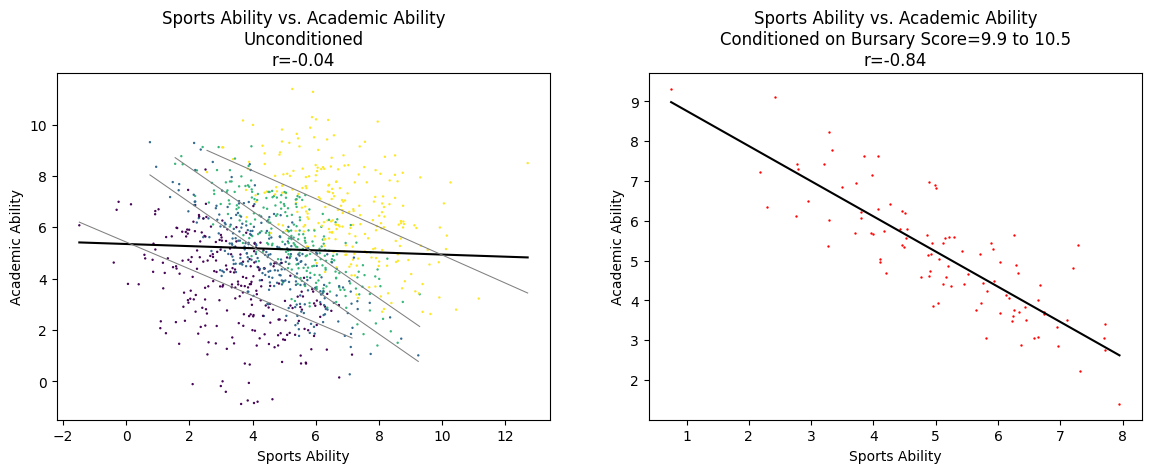

In [23]:
scatter_conditioned(X=df["Sports Ability"], Y=df["Academic Ability"], Z=df["Bursary Score"], strata=4)

The big surprise is that leaving a collider unconditioned means that the path is <b>blocked</b> as can be demonstrated by considering the low correlation of sports ability vs. academic ability.

In the real world this is unsurprising. People with a high degree of sporting ability are unusual and people with high academic ability are also unusual whilst people with exception ability in both fields are very rare and that is why the correlation is flat.

However, if we condition on bursary by fixing on a particular bursary score we actually unblock a path that was naturally blocked and that is also easily explained. If we are looking at a particular bursary score and the person has a low sports ability they are highly likely to have a high academic ability and vice versa.

<b>Conditioning on the intermediate node in a collider unblocks and opens the path and not conditioning on it leaves it blocked and closed.</b>

### Recap
To recap, a DAG will have multiple paths connecting the treatment node to the outcome and each path can be visualised by highlighting copies of the DAG or showing in the form $A \rightarrow B \rightarrow C$.

Within a path if we exclude the treatment and outcome nodes each node that is left will have two arrows with a node connected to each and this pattern of 3 nodes and two directional arrows is called a junction.

Each junction can be connected using one of only 3 patterns - a fork, chain or collider and it is important to know the effect of conditioning each (or leaving them unconditioned). 

Visualising the effect of conditioning on each pattern is a complex topic but essentially there are just 3 rules to remember -

- Conditioning on the intermediate node in a fork blocks the path whilst not conditioning on it leaves it unblocked and open.
- Conditioning on the intermediate node in a chain blocks and closes the path and not conditioning on it leaves it unblocked and open.
- Conditioning on the intermediate node in a collider unblocks and opens the path and not conditioning on it leaves it blocked and closed.

These are all the building blocks needed to move on to understanding how to condition and adjust complex DAGs and why that is important, but before moving onto that there is one more topic to explore ...

### Blocking and Unblocking Complex Paths
Consider the following path ...

$$ X \leftarrow Z1 \leftarrow Z3 \leftarrow Z2 \rightarrow Y$$

X is the treatment and Y is the outcome. Of the other nodes Z1 and Z3 are chains and Z2 is a fork. The question is - "how could we block this path?"

The answer is that in any path, no matter how long or complex it is, if a single node is blocked then the whole path is blocked.

This means that conditoning on Z2 on its own would block as it is a fork but also conditioning on just Z1 or just Z2 would block as well because they are chains. In fact any combination would work - {Z1}, {Z2}, {Z3}, {Z1, Z2}, {Z1, Z3}, {Z2, Z3}, {Z1, Z2, Z3}.

The optimum adjustment set to block the path is any one of the sets that contains a single node i.e. we should do the least amount of conditioning possible to block the path.

So now blocking complex paths has been explained you must be asking the question - "Why would I want to bother blocking a path?" The answer will become clear in the next section and the full power of Directed Acyclic Graphs will be revealed.

## Backdoor Adjustment ##

We have already explored how a confounder causes the isolated effect of a treatment on an outcome to be lost because the effect of the confounder is mixed in with that isolated effect.

We have also seen that conditioning on a confounder resolves this problem and enables the genuine effect of the treatment to be recovered ...

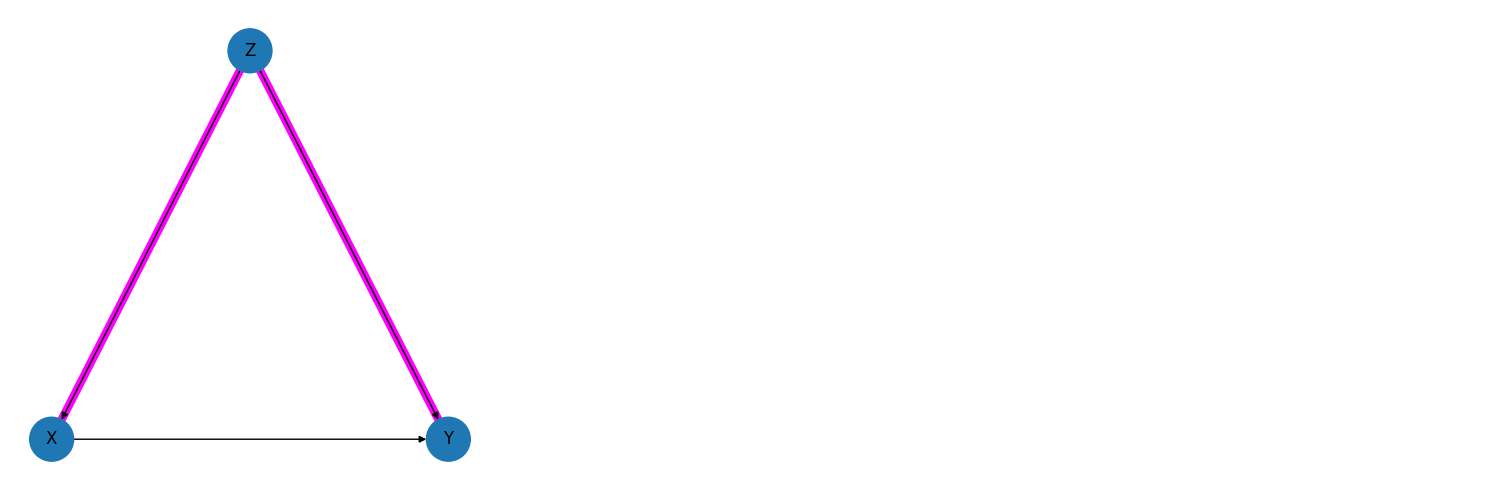

<IPython.core.display.Math object>

In [24]:
edges : list = [('Z', 'X'), ('Z', 'Y'), ('X', 'Y')]
pos : dict = {'X':(1, 1), 'Y':(3, 1), 'Z':(2, 2)}
    
dag = DirectedAcyclicGraph(treatment="X", outcome="Y", edges=edges, pos=pos)

dag.draw_paths(paths=dag.backdoor_paths())
plt.show()
dag.print_paths(paths=dag.backdoor_paths(), display_latex=True)

In this DAG if we condition on Z it blocks that path which has the desired effect. THe path that has been highlighted is called a back-door path and the direct path from X to Y is called a front-door path.

A common sense definition of a back-door path is "any path from the treatment to the outcome that contains a fork" but I tracked down a more formal definition proposed by Judea Pearl ...

<b>A back-door path is any path from X to Y that starts with an arrow pointing into X.</b>
The Book of Why, Pearl and Mackensie, p158

It also follows that <b>any path that is not a back-door path is a front-door path.</b>

### Valid Adjustment Sets
A valid adjustment set is any set of nodes which, when conditioned on, remove the effect of confounding and isolate the effect of the treatment on the outcome and their can be zero, one or more valid adjustment sets in any given DAG.

Here are a set of rules proposed by Judea Pearl that define valid adjustment sets ...

1. We block all spurious paths between X and Y.
2. We leave all directed paths from X to Y unperturbed.
3. We create no new spurious paths.

Pearl, Glymour and Jewell, "Causal Inference in Statistics", p61.

I consider this definition unsatisfying because the meaning of "spurious" is unclear to me and also I do not like "unperturbed" as my view is that sometimes you have to perturb a path to create the desired effect (more on this later).

Given my dissatisfaction with the official definition, here is my own proposal ...

<b>A valid adjustment set is any set of nodes that, when conditioned on, blocks and closes all back-door paths between the treatment and outcome and leaves at least one front-door path unblocked and open.</b>

#### A Worked Example
To test out my definition and to provide a worked example, let's go back to one of the earlier examples of a complex Directed Acyclic Graph ...

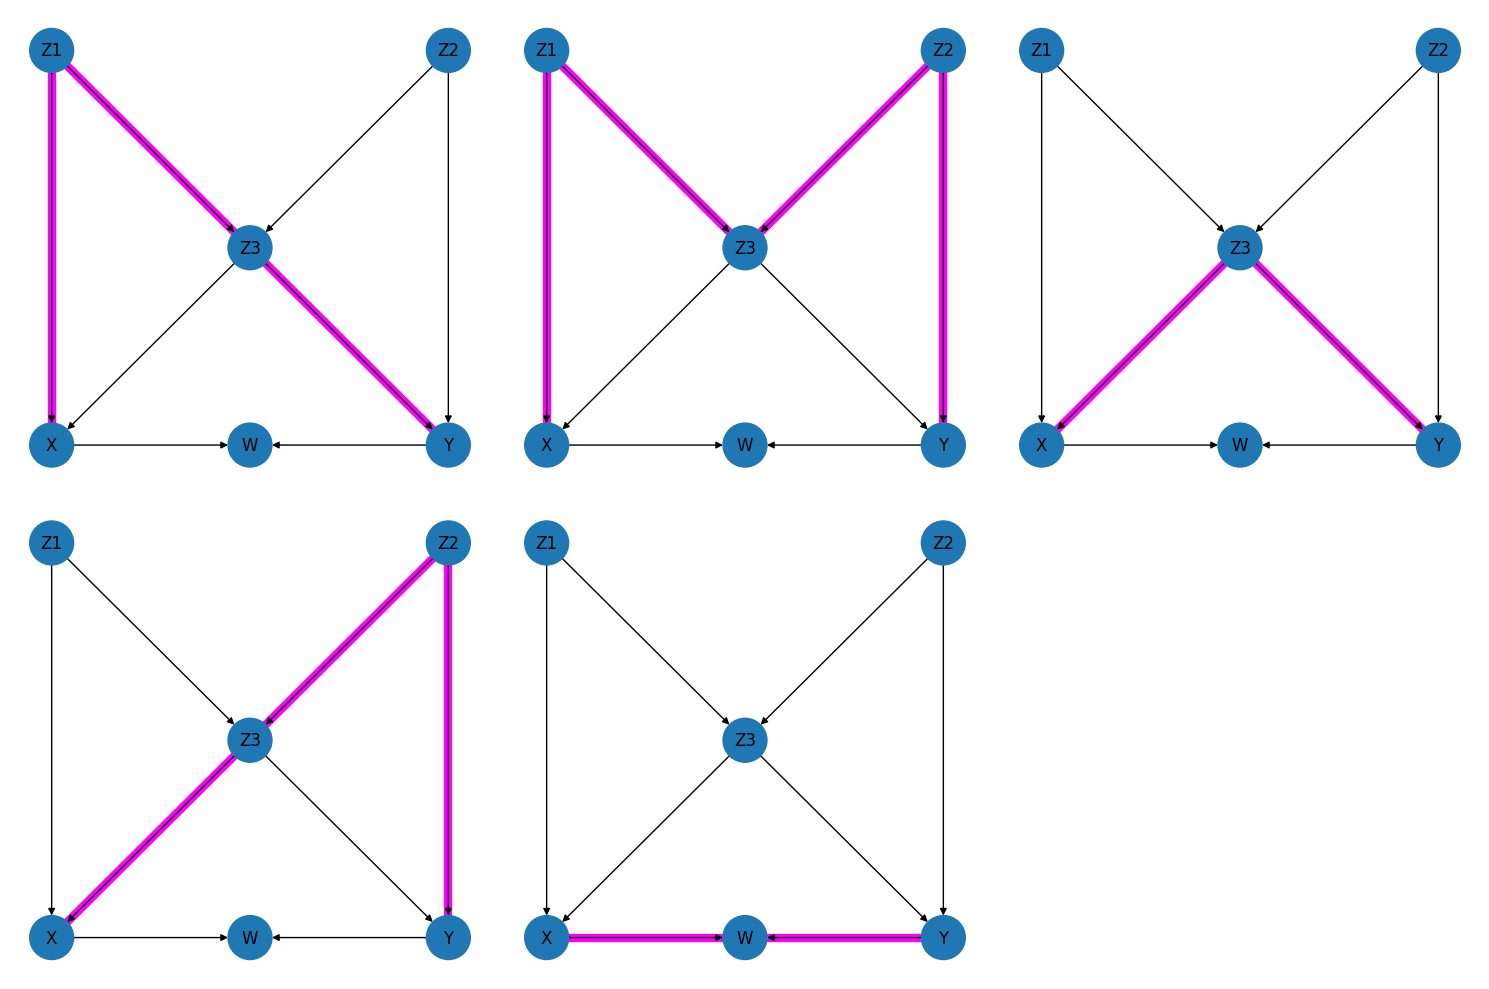

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [25]:
edges : list = [('Z1', 'Z3'),  ('Z1', 'X'),  ('Z3', 'X'), ('Z3', 'Y'), ('X', 'W'), ('Z2', 'Z3'), ('Z2', 'Y'), ('Y', 'W')]
pos : dict = {'X':(1, 1), 'W':(2, 1), 'Y':(3, 1), 'Z1':(1, 3), 'Z3':(2, 2), 'Z2':(3, 3)}
    
dag = DirectedAcyclicGraph(treatment="X", outcome="Y", edges=edges, pos=pos)

dag.draw_paths(paths=dag.all_paths())
plt.show()
dag.print_paths(paths=dag.all_paths(), display_latex=True)

Using Pearl's definition it is easy to see that the first 4 paths are back-door paths and the last one is a front-door path just by looking at the direction of the arrow pointing into or out of X.

In order to find the valid adjustment sets we need to identify <b>any set of nodes that, when conditioned on, blocks and closes all back-door paths between the treatment and outcome and leaves at least one front-door path unblocked and open.</b>

Z3 is the obvious node to condition on to start with because it is clearly confounding the treatment X and the outcome Y. Conditioning on Z3 blocks and hence de-confounds path 3.

So far, so good, but this is the part that I did not understand for a long time and that the available literature did not explain very well ...

In path 3, Z3 is a fork but in the M-shaped path 2 Z3 is a collider and we know that conditioning on a collider unblocks and opens the path. 
Therefore we have blocked node Z3 to close and block path 3 but in doing so we have unblocked and opened path 2! Conditioning on Z3 has resolved one issue, but has created another problem. 

However, that problem is easily solved. Conditioning on Z1 in addition to the conditioning on Z3 will block path 2. The logic is as follows -

- Z3 must remain conditioned to block path 3 but in doing so, opens path 2.
- Z1 can be additionally conditioned which blocks path 2 because Z1 is a fork in this path.

The solution for the whole DAG is nearly there, but not quite ...

Certainly conditioning on Z1 works but we could have conditioned on Z2 instead and in fact conditioning on both Z1 and Z2 would work as well so {Z1}, {Z2} and {Z1, Z2} are all equally valid adjustment sets.

The final piece of the puzzle is that path 5 is the only front-door path. Our earlier definition tells us that we must leave at least one front-door path unblocked and open but W is a collider which, if left unconditioned, will block and close path 5.

Therefore we must also condition on W to open the front-door path from X to Y. Note that this is why I disagree the use  of "unperturbed" because in this example path 5 must be perturbed to make sure there is an open front-door path from X to Y.

If the explanation is a bit complicated, it is much easier to visualise. Here are all the valid adjustment sets for the DAG ...

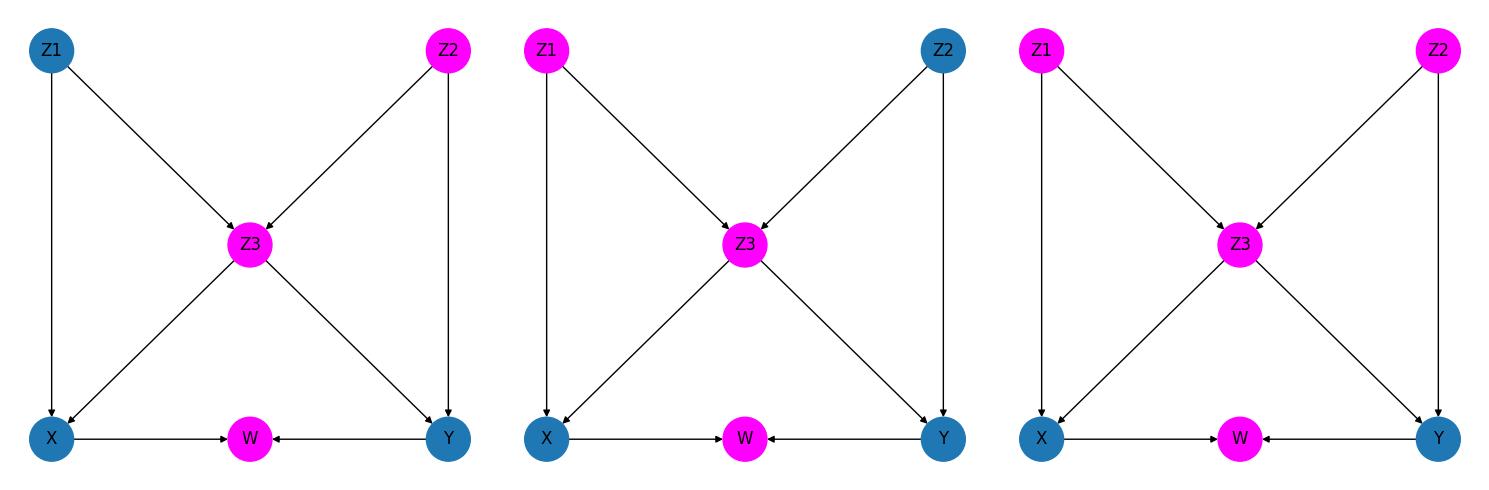

In [26]:
valid_adjustment_sets, _, _ = dag.valid_adjustment_sets()
valid_adjustment_sets

dag.draw_nodesets(valid_adjustment_sets)

Choosing any of the 3 will correctly adjust and condition the DAG by blocking and closing all 4 back-door paths and leaving the single front-door path unblocked and open.

The final concept in adjustment sets is the <b>optimal adjustment set</b> which is to select one of the valid adjustment sets that has the least number of nodes. 

In this example the optimal adjustment set would be either {Z1, Z3, W} or {Z2, Z3, W}. The 3rd valid adjustment set {Z1, Z2, Z3, W} is not optimal because it would involve carrying out more than the minimum number of adjustments.

#### Why is this important?
Deconfounding is critical to identifying the isolated causal effect of X and Y with the mixing effects of any confounders removed. 

For example we want to know the true impact of taking a drug on recovery irrespective of gender preferences for the drug or the true effect of sporting activity on academic performance irrespective of underlying fitness and the only way to do this is by constructing a DAG and conditioning or controlling on the correct set of nodes.

My view is that identifying an optimum adjustment set is equally valid for conditioning on historical, observational data or controlling on factors in a real-world trial.

If factors are not adjusted that should be then the results will be wrong and if too many factors are adjusted either the maths will be needlessly complicated for conditioning or the experiments and trials made cumbersome and un-wieldly in the real world.

## Jargon Busting
Before everything is brought together and applied to solve some example problems there are a few more pieces of causal jargon left to break down ...

### d-separation
One formal definition of <b>d-separation</b> is as follows -

A path p is blocked by a set of [conditioning] nodes Z if and only if

1. p contains a chain of nodes A -> B -> C or a fork A <- B -> C such that the middle node B is in Z (i.e. conditioned on), or
2. p contains a collider A -> B <- C such that the collision node B is not in Z and no descendant of B is in Z.
                                   
Causal Inference in Statistics, Pearl, Glymour and Jewell, p46

The language is initially difficult to unpack but given the explanations and examples above for forks, chains, colliders, conditioning etc. above a more straight-forward definition might be ...

<b>d-separation is the act of applying a set of conditioning nodes to a path such that it is blocked.</b>

The only part of the formal definition that is new is <b>and no descendant of B is in Z.</b> but that is easily explained.

Consider the following DAG ...

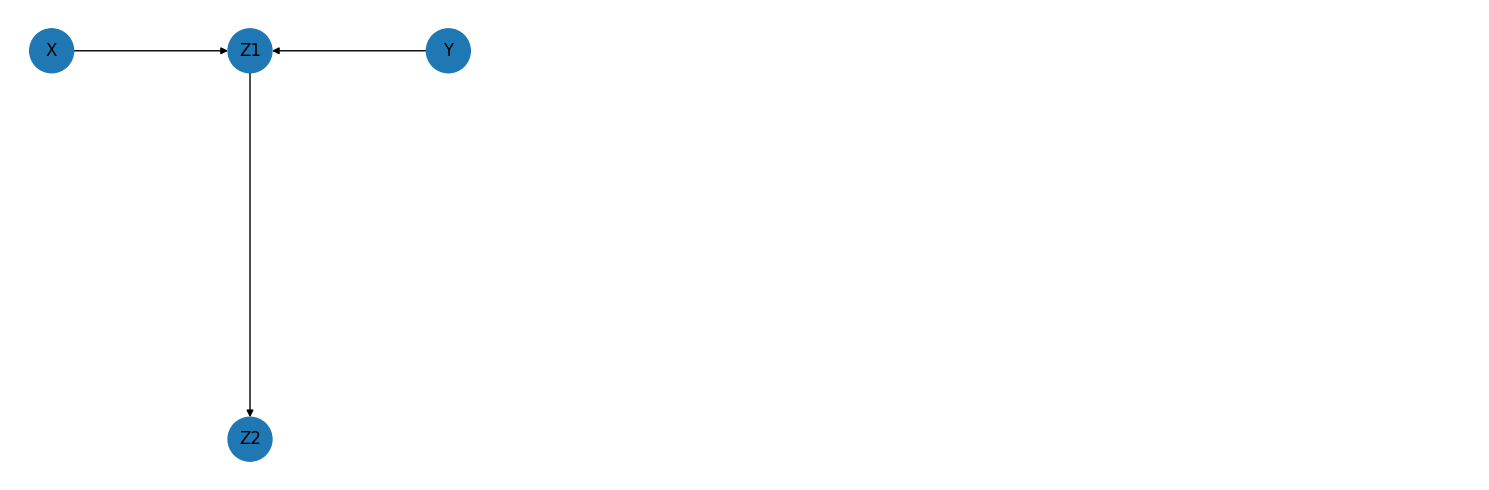

In [27]:
edges : list = [("X", "Z1"), ("Y", "Z1"), ("Z1", "Z2")]
pos : dict = {"X": (1, 2), "Z1": (2, 2), "Y": (3, 2), "Z2": (2, 1)}

dag = DirectedAcyclicGraph(treatment="Z", outcome="Y", edges=edges, pos=pos, unobserved_confounders=unobserved_confounders)
dag.draw(grid_size=3)

In this DAG Z1 is a collider on the path X -> Z1 <- Y so conditioning on Z1 will unblock and open the path whilst leaving it un-conditioned will leave the path blocked and closed.

The statement <b>and no descendant of B is in Z</b> means that conditioning (or un-conditioning) on Z2 has exactly the same effect as acting on Z1 the valid set of nodes to open path X -> Z1 <- Y is {Z1}, {Z2}.

This additional condition is difficult to visualise and rationalise so I have taken the approach of accepting it given the credentials of the authors that are describing and also to appreciate that its use is likely to be rare. Colliders are the most unusual of the 3 patterns and a descendant of a collider would be even more unusual.

It is worth bearing in mind though as a lot of the examples in the literature do throw in a descendant of a collider so be on the look out!

### d-connection
<b>d-connection</b> is the opposite of d-separation. I have not seen the formal definition in any of the literature but reversing the definition of d-separation would give the following -

A path p is unblocked by a set of [conditioning] nodes Z if and only if

1. p contains a chain of nodes A -> B -> C or a fork A <- B -> C such that the middle node B is not in Z (i.e. not conditioned on), or
2. p contains a collider A -> B <- C such that the collision node B is in Z or a descendant of B is in Z.

The more straight-forward, informal definition might be

<b>d-connection is the act of applying a set of conditioning nodes to a path such that it is unblocked.</b>

Note that the set of conditioning nodes may be the empty set {} and in fact will be the empty set unless the path contains a collider.

### Note on d-separation and d-connection
My view is that d-separation and d-connection are complicated and they do not serve any purpose in isolation. The end game is to identify a valid adjustment set or the optimal adjustment set in order to condition on the right set of nodes to isolate the effect of the treatment on the outcome.

I have included an explanation because the literature uses this terminology and hence understanding their meaning helps to read the literature, but my focus is on the adjustment sets.

### Unconditional dependence, unconditional independence,  conditional dependence and conditional independence
These 4 terms are commonly used in the literature, usually without a clear explanation. These are my definitions -

- <b>Unconditional dependence:</b> a particular path is naturally unblocked and open with no conditioning.
- <b>Unconditional independence:</b> a particular path is naturally blocked and closed with no conditioning.
- <b>Conditional dependence:</b> a particular path that has been conditioned on is unblocked and open.
- <b>Conditional independence:</b> a particular path that has been conditioned on is blocked and closed.

<b>Dependence</b> infers that the outcome depends on the treatment i.e. a change in the value of the treatment changes the value of the outcome.

<b>Independence</b> infers that the outcome does not depend on the treatment i.e. a change in the value of the treatment does not change the value of the outcome.

### Exogenous and Endogenous Variables
There are two more terms commonly used in the literature that are easily understood by visualising them. Consider the following DAG ..

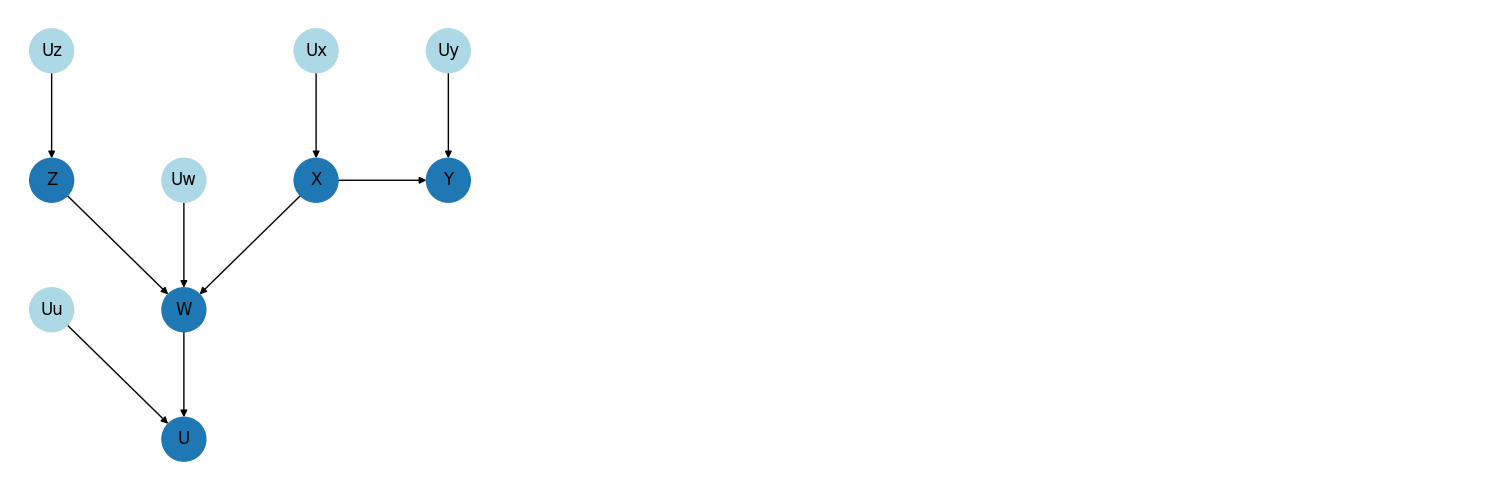

In [28]:
edges : list = [("Z", "W"), ("W", "U"), ("X", "W"), ("X", "Y"), ("Uz", "Z"), ("Uu", "U"), ("Uw", "W"), ("Ux", "X"), ("Uy", "Y")]
pos : dict = {"Z": (1, 3), "U": (2, 1), "W": (2, 2), "X": (3, 3), "Y": (4, 3), "Uz": (1, 4), "Uu": (1, 2), "Uw": (2, 3), "Ux": (3, 4), "Uy": (4, 4)}

unobserved_confounders = ["Uz", "Uu", "Uw", "Ux", "Uy"]
dag = DirectedAcyclicGraph(treatment="Z", outcome="Y", edges=edges, pos=pos, unobserved_confounders=unobserved_confounders)
dag.draw(grid_size=3)

The light blue nodes are <b>exogenous</b> and the dark blue <b>endogenous</b>. 

A formal definition of <b>exogenous variables</b> might be <b>variables that are external to the model i.e. we choose, for whatever reason, not to explain how they are caused.</b>

Stated more simply the exogenous nodes have no inputs, only outputs i.e. they do not have any causes but they do cause other variables to change. 

Endogenous nodes are the opposite, they do have inputs or causes that are internal to the "system" being studied.

In the literature it is common to see a structural causal model defined using U to represent the exogenous variables and V for the endogenous variables as follows ...

- V = {Z, W, U, X, Y}
- U = {Uz, Uu, Uw, Ux, Uy}

### Unobserved Confounders
Unobserved confounders are commonly represented as "U" nodes on causal diagrams but they should not be confused with <b>exogenous variables</b>. 

An unobserved confounder is <b>a variable that influences both the treatment and the outcome but is not measured or included in the analysis</b>. An example might be if we suspected that gender was influencing both the uptake and efficacy of the drug but it had not been measured in the analysis.

There are several causal techniques available for taking account of unobserved confounders but these are beyond the scope of this article.

## Putting it all Together with Some Practical Examples
All of the techniques required to understand the vast majority of directed acyclic graphs have now been covered so it is time to put that knowledge to the test to analyze a selection of DAGs.

Here is a methodology for solving a DAG and to identifying the optimum adjustment set ...

1. Study the DAG and identify all of the paths between the treatment and the outcome.
2. Separate the paths into back-door (with an arrow pointing into the treatment) and front-door (with an arrow  pointing out of the treatment).
3. The front-door path (there will usually be only 1) does not need conditioning unless it contains a collider, in which case add the collider to the set of nodes to condition on.
4. Each back-door path will need to be conditioned on by choosing either a fork or a chain from the nodes on the path. Add these to the set of nodes to condition.
5. Consider the nodes you have selected to ensure they meet these criteria -
    a. All back-door paths have been blocked and closed.
    b. At least one front-door path has been left open or un-blocked.
6. If there are multiple adjustment sets that achieve the criteria in step 4, select the one with the lowest number of nodes.

By following this methodology you will be able to identify the optimal adjustment set from any DAG.

The following examples apply that methodology with a solution and explanation for each.

### Example 1

[[], ['B']]


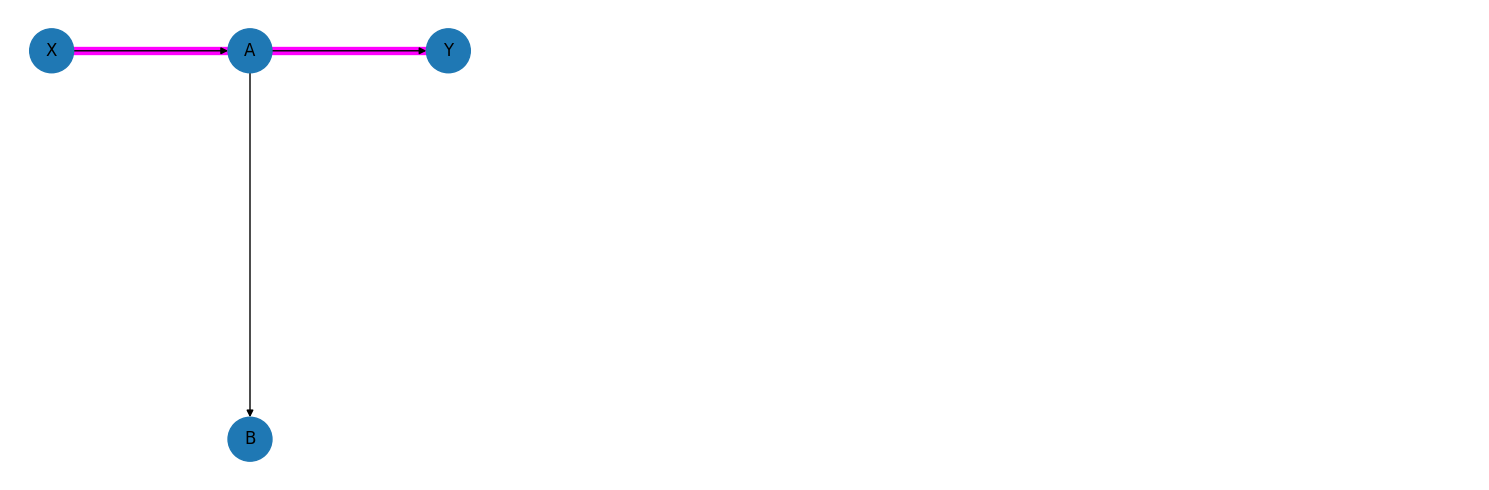

<IPython.core.display.Math object>

In [29]:
edges : list = [("X", "A"), ("A", "Y"), ("A", "B")]
pos : dict = {"X": (1, 2), "A": (2, 2), "Y": (3, 2), "B": (2, 1)}

dag = DirectedAcyclicGraph(treatment="X", outcome="Y", edges=edges, pos=pos)

print(dag.valid_adjustment_sets()[0])
dag.draw_paths(dag.all_paths(), print_paths=True, display_latex=True)

Let's start with an easy one. There are no back-door paths and a single front-door path X -> A -> Y that is unblocked, hence no conditioning is necessary (i.e. the optimal adjustment set is the empty set {}).

### Example 2

[[], ['D'], ['A'], ['C'], ['A', 'D'], ['C', 'D'], ['B', 'D'], ['A', 'C'], ['A', 'B'], ['A', 'C', 'D'], ['A', 'B', 'D'], ['B', 'C', 'D'], ['A', 'B', 'C'], ['A', 'B', 'C', 'D']]


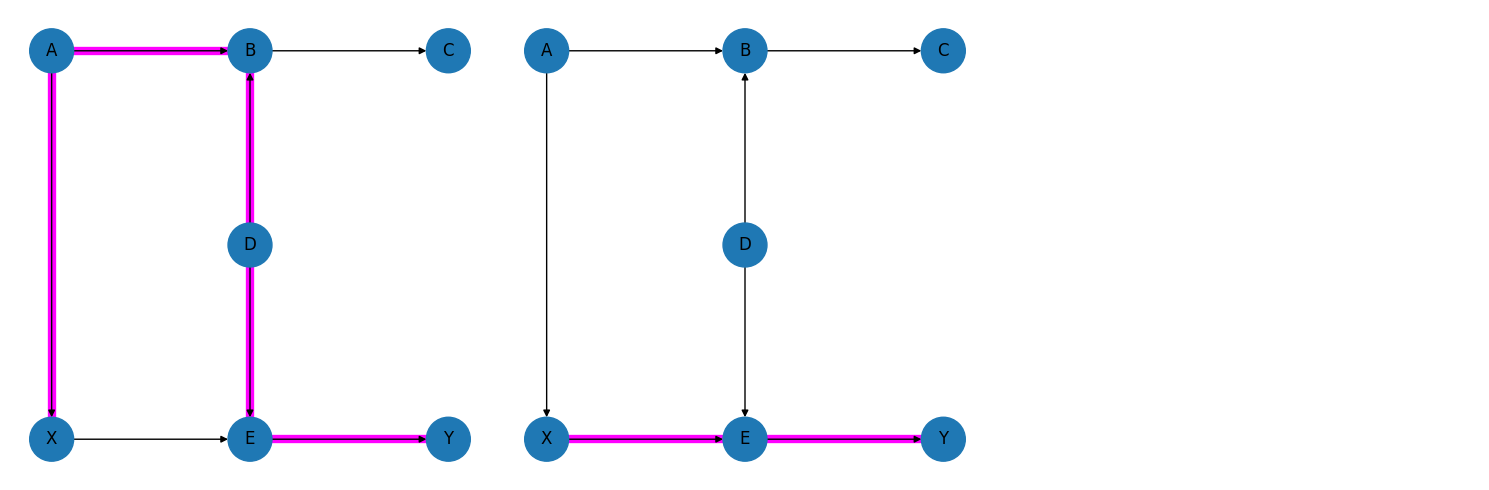

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [30]:
edges : list = [("A", "B"), ("B", "C"), ("A", "X"), ("X", "E"), ("D", "B"), ("D", "E"), ("E", "Y")]
pos : dict = {"X": (1, 1), "A": (1, 2), "E": (2, 1), "D": (2, 1.5), "B": (2, 2), "Y": (3, 1), "C": (3, 2)}

dag = DirectedAcyclicGraph(treatment="X", outcome="Y", edges=edges, pos=pos)

print(dag.valid_adjustment_sets()[0])
dag.draw_paths(dag.all_paths(), print_paths=True, display_latex=True)

This one requires a bit more thinking about. There is a single back-door path (path 1) and a single front-door path (path 2).
Front-door path 2 is not blocked so needs no conditioning to remain valid and open. Back-door path 1 has a collider at B and so is naturally blocked and also needs no action.

In conclusion all back-door paths are naturally blocked and front-door paths naturally unblocked so the optimum adjustment set is again the empty set {}.

The story does not end there though. It should be noted that node C could be conditioned on and that would do no harm as it does not affect anything.

Also the fork at A could be conditioned on which double-blocks the back-door path 1 in addition to the unconditioned blocking of collider B and again the DAG would be correctly adjusted.

This illustrates that there can be more than one way to adjust or condition a DAG to get the "correct" results and that yet again there may be a difference between the way statisticians and causal inference specialists decide to act.

Pearl quotes a leading statistician (anonymously) who wrote "To avoid conditioning on some observed covariates ... is nonscientific ad hockery" (The Book of Why, Pearl and Mackenzie, p160) but the brute force approach of conditioning on everything can be refuted with this example.

Conditioning on B or C would open and unblock back-door path 1 which needs to be closed (B because it is a collider and C because it is a descendant of a collider). If B or C were conditioned or controlled then path 1 could be re-blocked by additionally controlling on A or E (or both) but this could lead to complicated maths (for conditioning) or a real-world trial that is difficult to moderate (for controlling).

My preference is to use historical and observational data, optimise the adjustment set, simplify the maths and use conditioning but others may have a different view.

### Example 3

[['B'], ['A', 'B']]


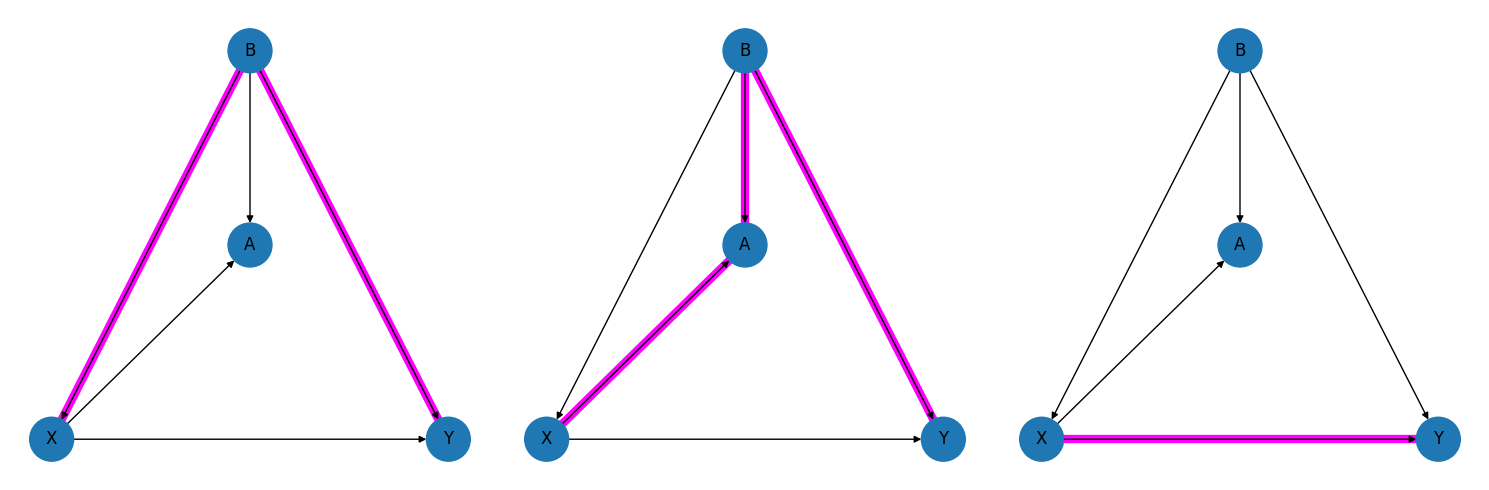

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [31]:
edges : list = [("B", "X"), ("B", "A"), ("B", "Y"), ("X", "A"), ("X", "Y")]
pos : dict = {"X": (1, 1), "A": (2, 1.5), "B": (2, 2), "Y": (3, 1)}

dag = DirectedAcyclicGraph(treatment="X", outcome="Y", edges=edges, pos=pos)

print(dag.valid_adjustment_sets()[0])
dag.draw_paths(paths=dag.all_paths(), print_paths=True, display_latex=True)

Path 3 is an open, unblocked front-door path which does not need any conditioning.

There are two back-door paths. Path 1 contains a fork at B which must be conditioned on. Path 2 contains a collider at A so path 2 is unconditionally blocked.

The optimal adjustment set is {B} but to note conditioning on {A, B} would also work because even though conditioning on A would unblock the collider, path 2 would be blocked by conditioning on B.

The statistical solution might be to control on A and B but the optimal causal solution is to condition just on B.

### Example 4

[['A'], ['B'], ['A', 'B']]


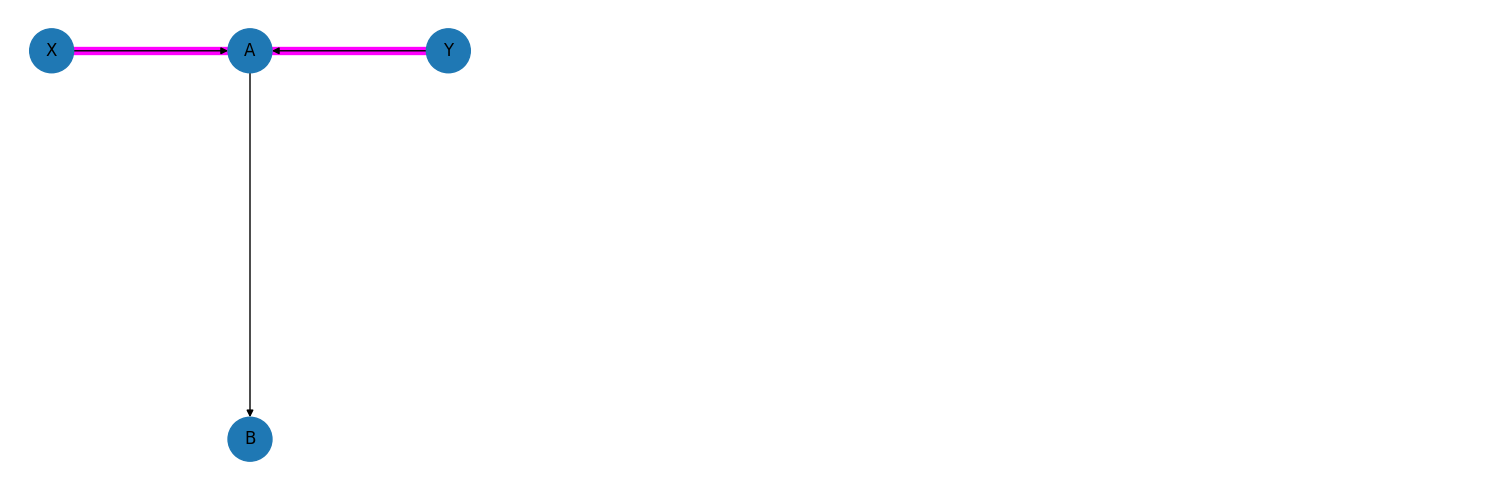

<IPython.core.display.Math object>

In [32]:
edges : list = [("X", "A"), ("Y", "A"), ("A", "B")]
pos : dict = {"X": (1, 2), "A": (2, 2), "Y": (3, 2), "B": (2, 1)}

dag = DirectedAcyclicGraph(treatment="X", outcome="Y", edges=edges, pos=pos)
print(dag.valid_adjustment_sets()[0])
dag.draw_paths(paths=dag.all_paths(), print_paths=True, display_latex=True)

This example is a bit sneaky! It is a variation of Example 1 with a single front-door path but this time A is a collider.

As A is a collider it will close and block the front-door path 1 so a perfectly valid solution is to condition on A.

However, B is a descendant of A and recalling the definition of d-separation above i.e. ...

1. p contains a chain of nodes A -> B -> C or a fork A <- B -> C such that the middle node B is in Z (i.e. conditioned on), or
2. p contains a collider A -> B <- C such that the collision node B is not in Z and no descendant of B is in Z.

... conditioning on B has exactly the same effect as conditioning on A.

Therefore the valid adjustment sets are {A}, {B} and {A, B} and the optimal adjustment set is either {A} or {B}.

### Example 5

[[], ['Q'], ['I'], ['I', 'Q']]


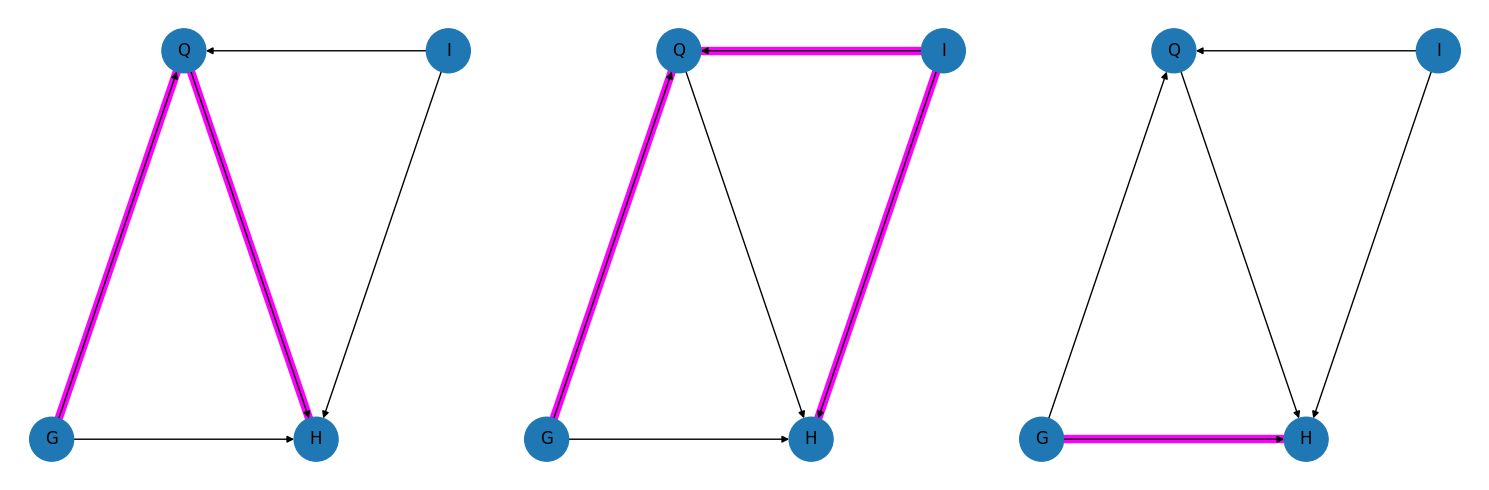

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [33]:
edges : list = [("G", "Q"), ("G", "H"), ("Q", "H"), ("I", "Q"), ("I", "H")]
pos : dict = {"G": (1, 1), "Q": (2.5, 2), "H": (4, 1), "I": (5.5, 2)}

dag = DirectedAcyclicGraph(treatment="G", outcome="H", edges=edges, pos=pos)

print(dag.valid_adjustment_sets()[0])
dag.draw_paths(paths=dag.all_paths(), print_paths=True, display_latex=True)

In this DAG the nodes represent the following variables -

- G : Gender (treatment)
- H : Hiring (outcome)
- Q : Qualifications
- I : Income

The objective is to capture the causal of gender (the treatment) on hiring (the outcome). In addition the DAG proposes that gender has a causal effect on qualification and income has a causal effect on both qualification and hiring.

It looks quite complicated but it is easy to solve. There are no arrows into the treatment G so no back-door paths. All 3 paths are front-door paths which are all open and unblocked without any conditioning hence the optimal adjustment set is {} and.

Note that there are several sets of nodes that could be conditioned on that would produce the correct result but taking no action is optimal. For example, conditioning on I would block path 2 but the other front-door paths would remain open.

This is another instance of where the causal inference perspective would choose no action to keep the maths simple and the statistical perspective may choose to control on some of the variables.

### Example 6

[['U'], ['W'], ['U', 'W']]


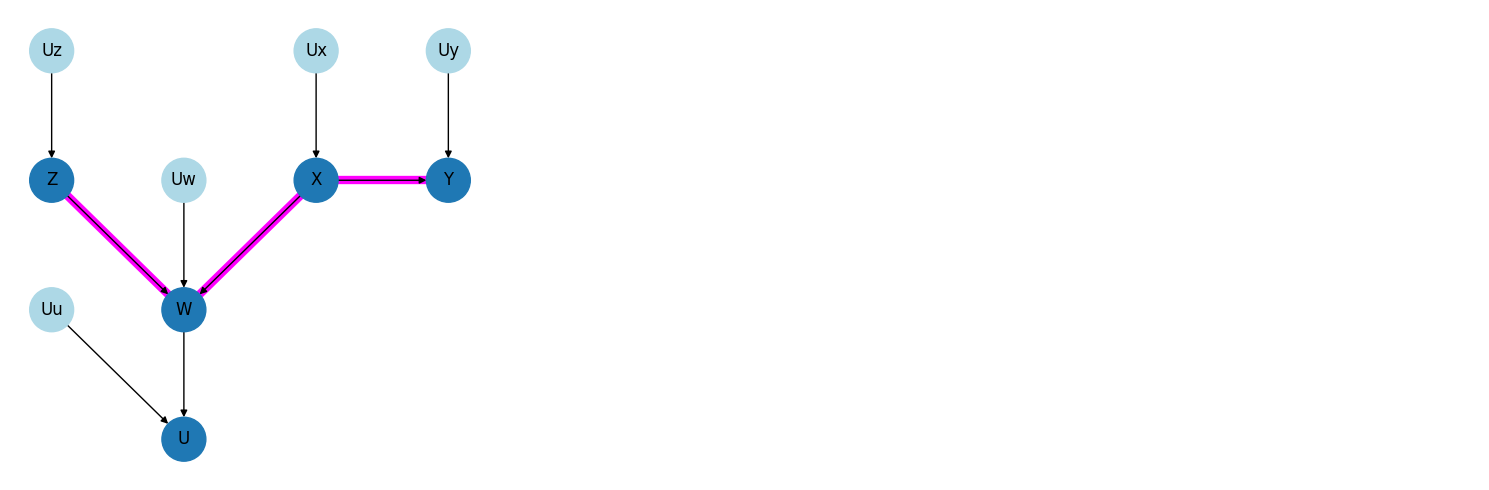

<IPython.core.display.Math object>

In [34]:
edges : list = [("Z", "W"), ("W", "U"), ("X", "W"), ("X", "Y"), ("Uz", "Z"), ("Uu", "U"), ("Uw", "W"), ("Ux", "X"), ("Uy", "Y")]
pos : dict = {"Z": (1, 3), "U": (2, 1), "W": (2, 2), "X": (3, 3), "Y": (4, 3), "Uz": (1, 4), "Uu": (1, 2), "Uw": (2, 3), "Ux": (3, 4), "Uy": (4, 4)}

unobserved_confounders = ["Uz", "Uu", "Uw", "Ux", "Uy"]
dag = DirectedAcyclicGraph(treatment="Z", outcome="Y", edges=edges, pos=pos, unobserved_confounders=unobserved_confounders)

print(dag.valid_adjustment_sets()[0])
dag.draw_paths(paths=dag.all_paths(), print_paths=True, display_latex=True)

This example looks more complicated is actually very straightforward. The light blue nodes are <b>exogenous</b> variables i.e. variables whose cause we have chosen not to explain.

This may give rise to the question "why include them at all?". In the earlier section on forks shoe-size was defined in the model as follows (where shoe-size = S and age = A) -

$$S = 2A + 2 + \epsilon$$

This example shows that age is exogenous - there is no explanation for the "cause" of age but age is critical to the model because shoe-size is derived from it.

This also helps to illustrate the difference between exogenous variables and unobserved confounders. In a causal model we would have the data for any exogenous variables, but we would not have the data for any unobserved confounders. 

When calculating the valid and optimal adjustment sets unobserved confounders should always be excluded from consideration as we do not have any data on them, hence they are impossible to condition on.

Exogenous variables can be included in conditioning sets. In the age and shoe size example it made perfect sense to condition on age as it was confounding shoe size and academic ability whereas in this example it does no harm to condition on the exogenous variables but it will not be optimal as none of them appear in the only path (path 1).

So what is the optimal adjustment set for this example?

Assuming that Z is the treatment and Y is the outcome, there are no back-door paths and just 1 front-door path. That path is blocked by the collider W which can be conditioned on to open and unblock it.

It should also be noted that U is a descendant of collider W and hence conditioning on U will have the same effect as conditioning on W.

Therefore there are 3 valid adjustment sets - {W}, {U} and {W, U} with either of the first two being optimum.

### Example 7

[['T', 'U'], ['T', 'W'], ['T', 'U', 'W']]


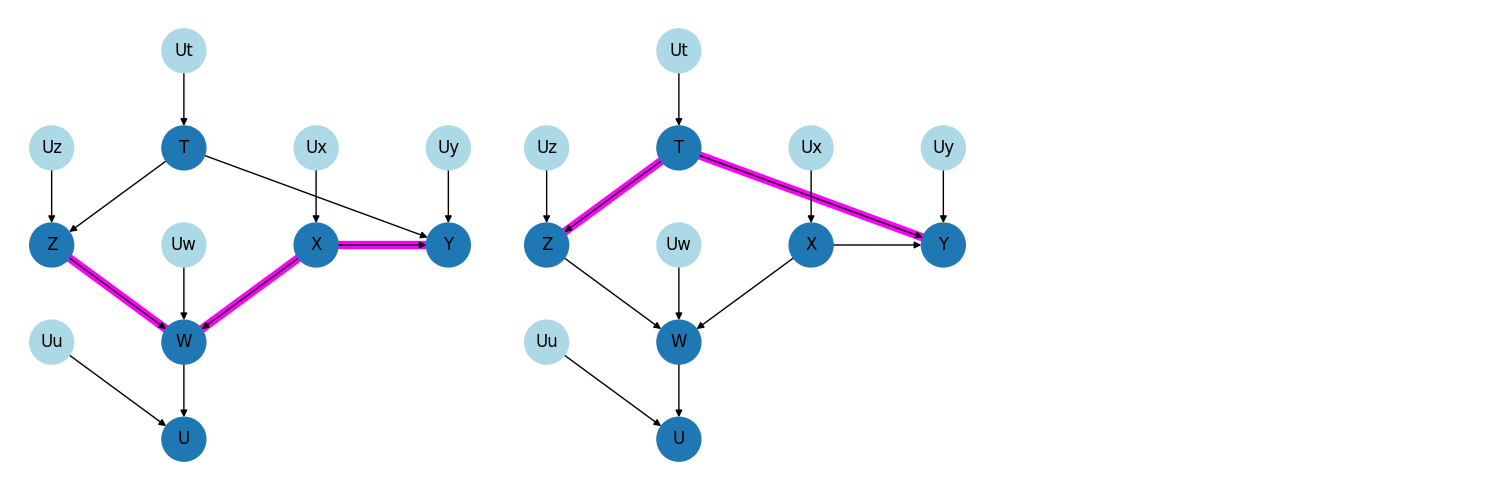

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [35]:
edges : list = [("Z", "W"), ("W", "U"), ("X", "W"), ("X", "Y"), ("Uz", "Z"), ("Uu", "U"), ("Uw", "W"), ("Ux", "X"), ("Uy", "Y"), ("T", "Z"), ("T", "Y"), ("Ut", "T")]
pos : dict = {"Z": (1, 3), "U": (2, 1), "W": (2, 2), "X": (3, 3), "Y": (4, 3), "Uz": (1, 4), "Uu": (1, 2), "Uw": (2, 3), "Ux": (3, 4), "Uy": (4, 4), "T": (2, 4), "Ut": (2, 5)}

unobserved_confounders = ["Uz", "Uu", "Uw", "Ux", "Uy", "Ut"]
dag = DirectedAcyclicGraph(treatment="Z", outcome="Y", edges=edges, pos=pos, unobserved_confounders=unobserved_confounders)

print(dag.valid_adjustment_sets()[0])
dag.draw_paths(paths=dag.all_paths(), print_paths=True, display_latex=True)

Example 7 is an extension of example 6. This time a back-door path has been added with a fork at T between the treatment Z and the outcome Y.

T must be conditioned on to block back-door path 2 and hence there are two optimum adjustment sets - {T, W} and {T, U}.

### Example 8

[['A', 'B', 'E', 'S', 'U']]


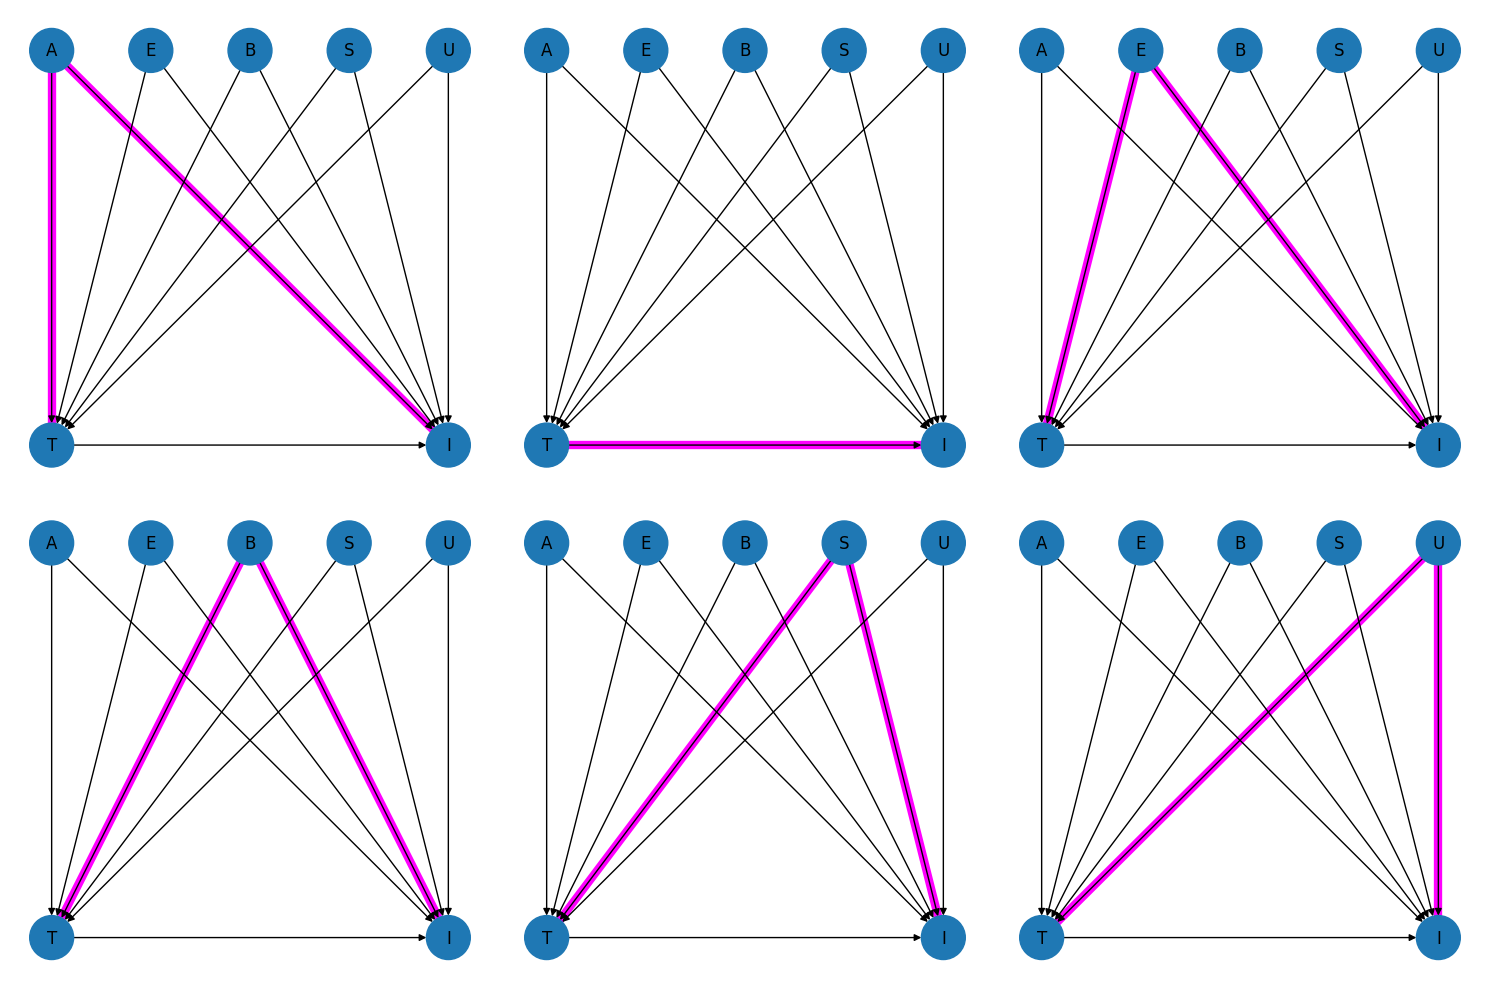

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [36]:
edges : list = [("A", "T"), ("A", "I"),
                               ("E", "T"), ("E", "I"),
                               ("B", "T"), ("B", "I"),
                               ("S", "T"), ("S", "I"),
                               ("U", "T"), ("U", "I"),
                               ("T", "I")]
    
pos : dict = {"T": [1,1], "A": [1, 5], "E": [6, 5], "B": [11, 5], "S": [16, 5], "U": [21, 5], "I": [21, 1]}

dag = DirectedAcyclicGraph(treatment="T", outcome="I", edges=edges, pos=pos)

print(dag.valid_adjustment_sets()[0])
dag.draw_paths(paths=dag.all_paths(), print_paths=True, display_latex=True)

The nodes in this DAG represent the following variables ...

- T : training
- I : income
- A : age
- E : education
- B : benefits
- S : single
- U : university degree

The DAG is representing the causal impact of a training course T on income I and also representing that age, education, benefits, single (vs. married) and a university degree all cause and confound both i.e. whether the individual will attend the training and their income.

There are 5 back-door paths (paths 1, 3, 4, 5 and 6) and 1 front-door path (path 2).

The front-door path is open and unblocked and does not need any conditioning.

The back-door paths all have a single fork and no intermediate node appears on more than one back-door path so all of the forks need to be conditioned on.

The optimum (and only) adjustment set is {A, E, B, S, U} noting that U = university degree, not to be confused with unobserved.

### Example 9

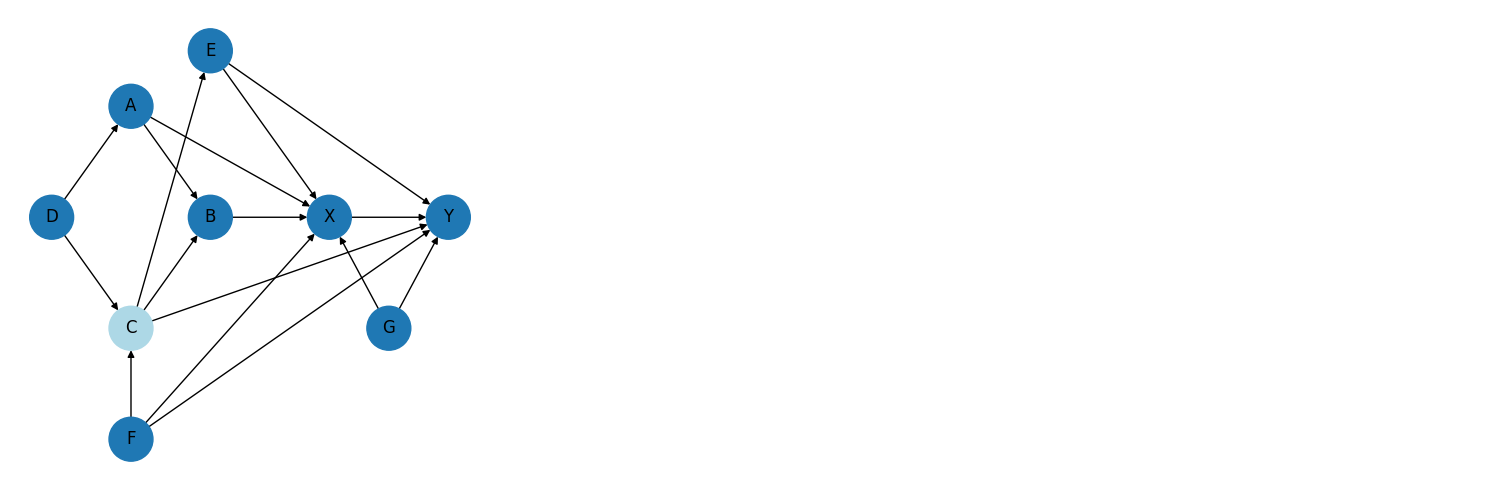

In [37]:
unobserved_confounders = ["C"]
edges : list = [("A", "B"), ("A", "X"), ("B", "X"), ("C", "E"), ("C", "B"), ("C", "Y"), ("D", "A"), ("D", "C"), ("E", "X"), ("E", "Y"), ("F", "C"), ("F", "X"), ("F", "Y"), ("G", "X"), ("G", "Y"), ("X", "Y")]
pos : dict = {"D": (1, 3), "F": (2, 1), "C": (2, 2), "A": (2, 4), "B": (3, 3), "E": (3, 4.5), "X": (4.5, 3), "G": (5.25, 2), "Y": (6, 3)}

dag = DirectedAcyclicGraph(treatment="X", outcome="Y", edges=edges, pos=pos, unobserved_confounders=unobserved_confounders)
dag.draw(grid_size=3)

The nodes in this DAG represent the following variables ...

- A : Parental Smoking
- B : Childhood Asthma
- C : Underlying Atopy (Unobserved)
- D : Parental Asthma
- E : Chronic Bronchitis
- F : Sex
- G : Socio-economic Status
- X : Smoking
- Y : Asthma

This is an extremely complex DAG. There are 20 paths through the DAG in total that can be visualised as follows ...

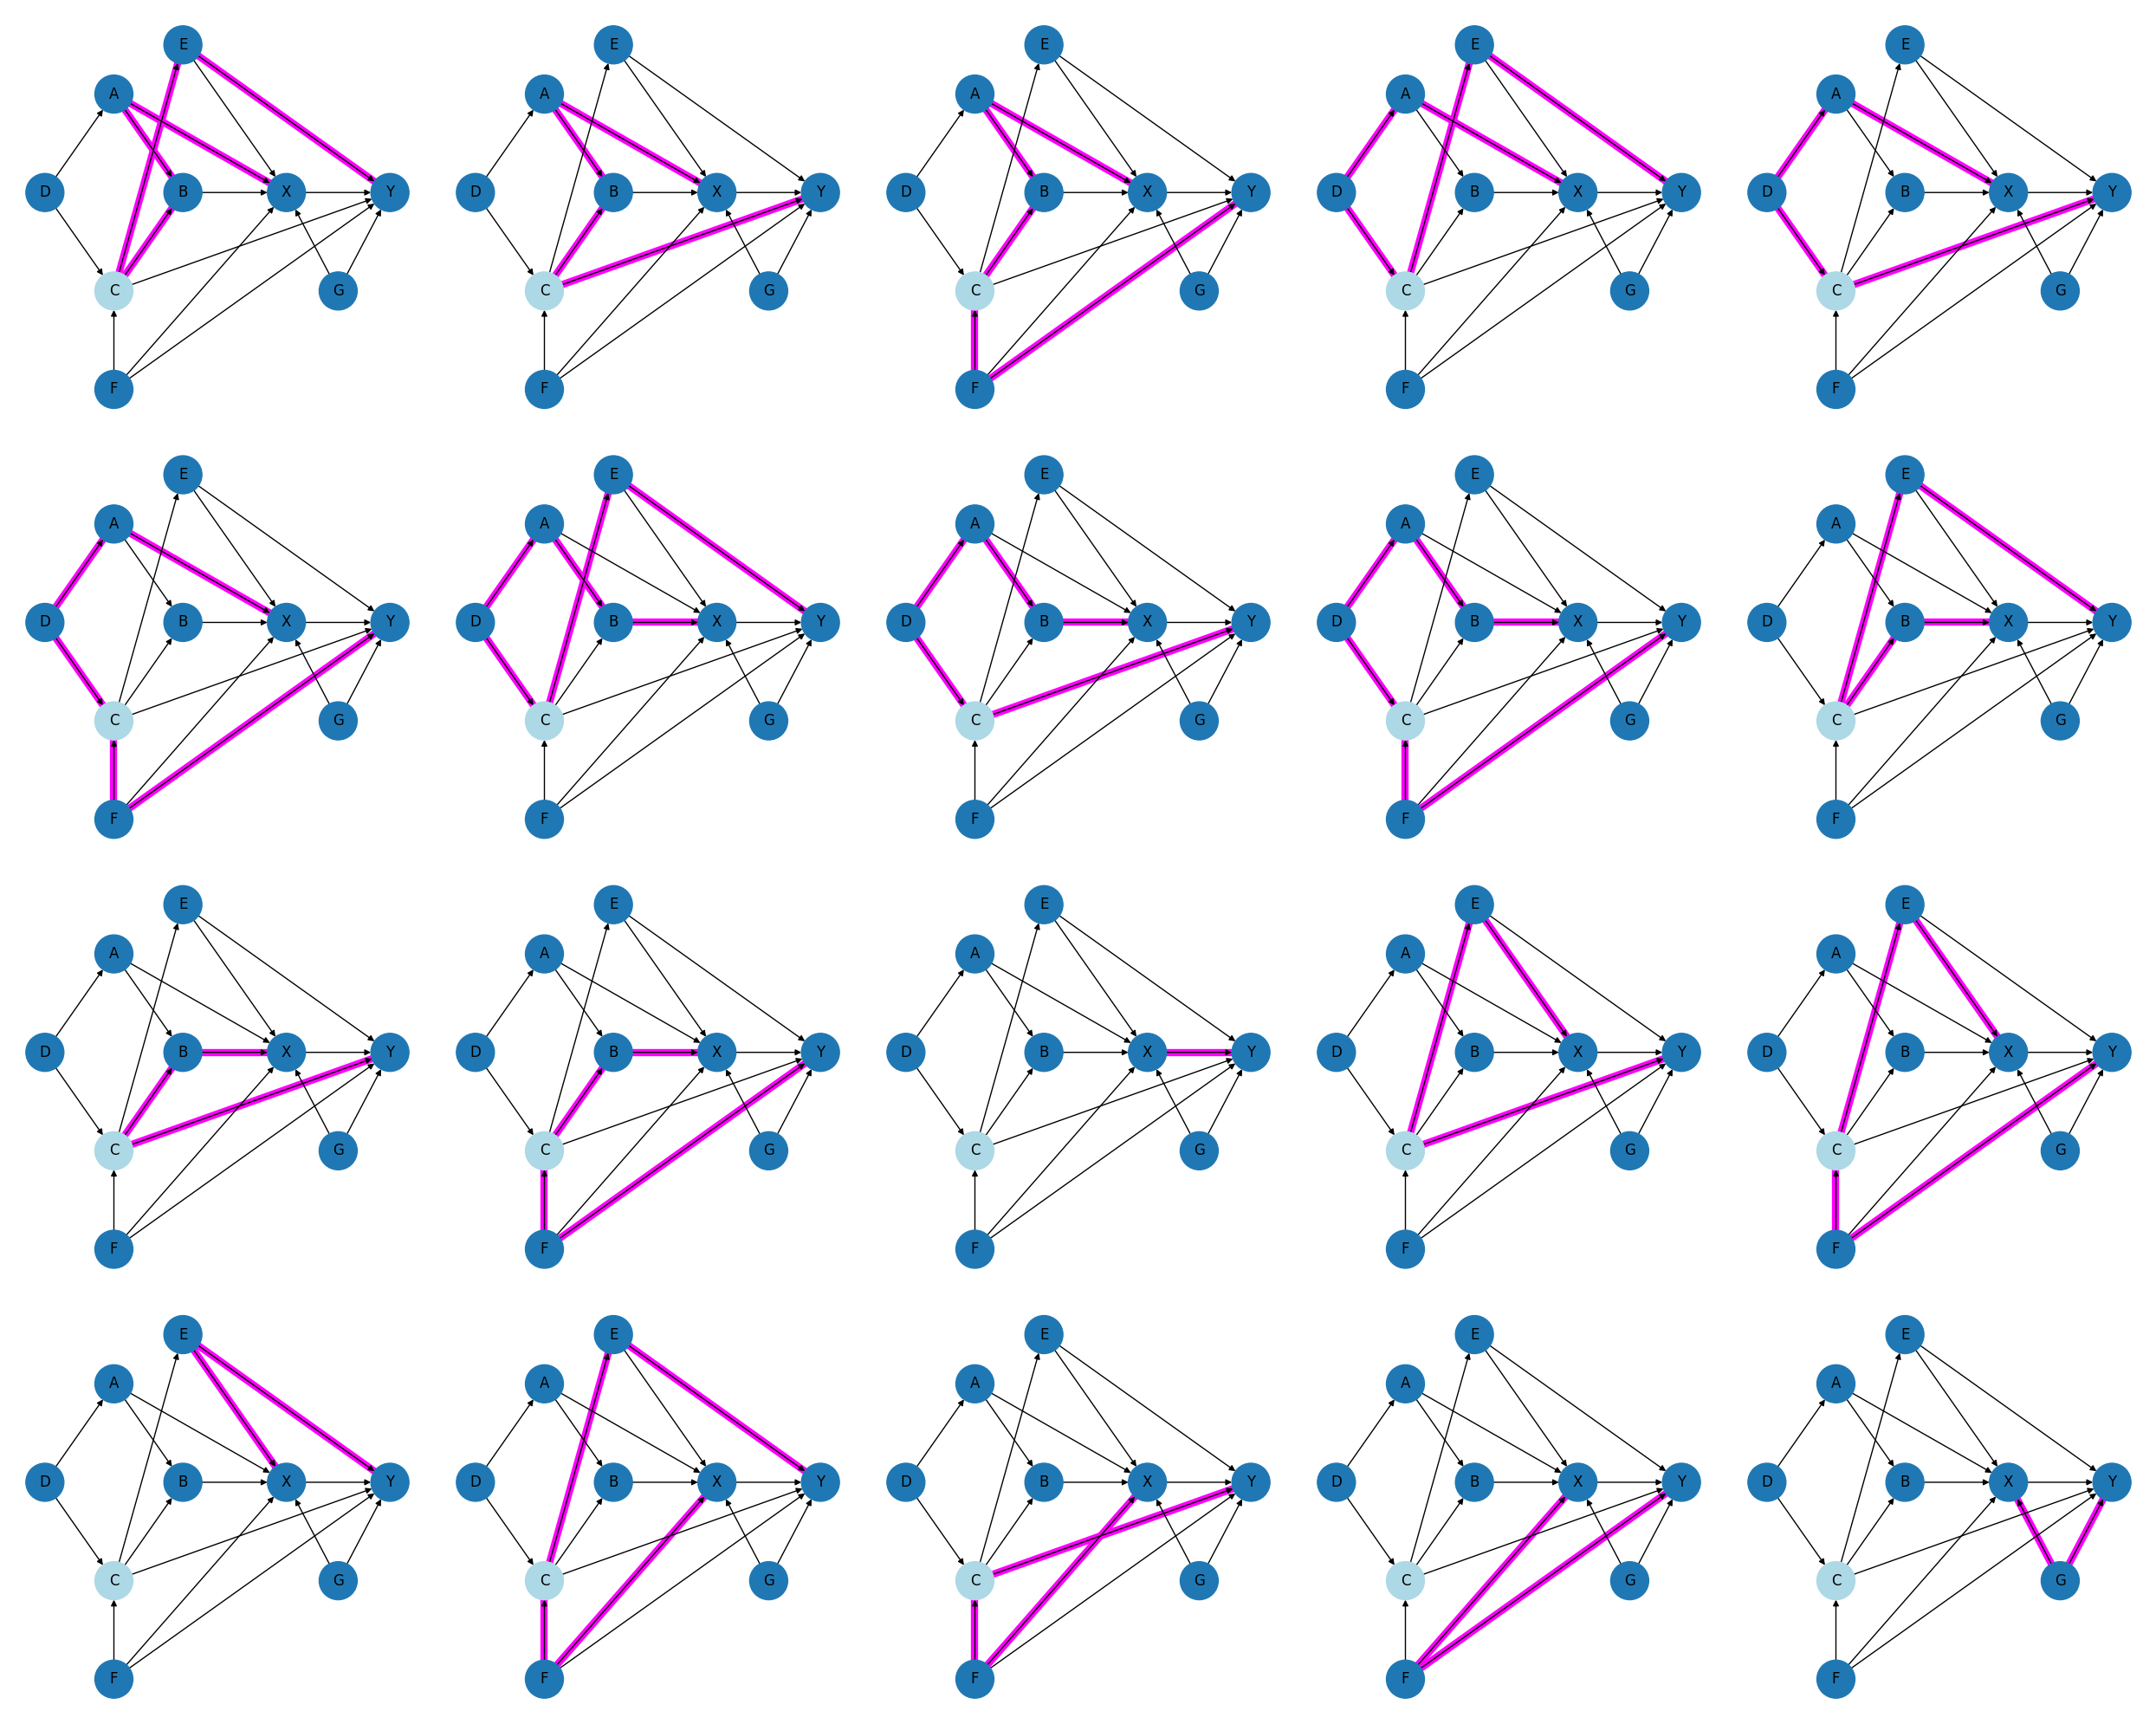

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [39]:
dag.draw_paths(paths=dag.all_paths(), print_paths=True, display_latex=True, cols=5)

Path 13 is the only front-door path, the other 19 are all back-door paths. 

There are 64 possibilities for different sets of nodes that might be able to condition the DAG successfully for example {D}, {D, B}, {D, B, E} etc. and 20 different paths that each possible set of nodes need testing for so 1,280 permutations.

There are precisely two valid adjustment sets - {A, B, E, F, G} and {A, B, D, E, F, G} with the first being the optimum adjustment set.

It would be very difficult and time-consuming for a human being to have checked all 1,280 permutation and to have made sure that all of the back-door paths are left open.

You may have guessed by now from all of the pictures of DAGs and the examples I have worked through that I have developed a code library called ``DirectedAcyclicGraph`` that has done all of the drawing and route-finding for me. 

This article has been the documentation of everything I have learned whilst developing that library and the library itself will be the subject of a future article.

## Conclusion
For anyone that has made it to the end of such a long and detailed article, thank-you for sticking with it! Most of my articles are relatively short and focused and contain all of the source code and this one has been the exact opposite!

However, it has ended up detailing and explaining all of the things  I wish I had known in relation to Directed Acyclic Graphs when I started my Causal Inference journey. 

There are many articles and books available but in my view they miss the mark. They usually jump straight in with formulas and equations and jump past the point where the basics and fundamentals are explained with the aid of examples and visualisations.

The DAGs that capture the causal relationships are one of the most important parts of causal inference. None of the rest of it makes sense without a full understanding of what they are, why they exist and how they help to identify adjustment sets which is so critical to understand before moving on the applying the back-door (or front-door) adjustment to answer to the question "what is the isolated effect of the treatment on the outcome independent of any confounding effects?"